In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn
import os
import numpy as np
from scipy.optimize import curve_fit

import decomposition
import scaler

In [2]:
def get_latttice_size_su3(beta):
    return 0.5 * scaler.get_r0(beta)

def get_lattice_size(beta, size):
    return get_latttice_size_su3(beta) * size

In [6]:
beta_arr = [6, 6.1, 6.2, 6.3]
size_arr = [24, 28, 32, 36]
for i in range(len(beta_arr)):
    print(get_latttice_size_su3(beta_arr[i]))
    print(get_lattice_size(beta_arr[i], size_arr[i]))

0.09314972067846226
2.2355932962830942
0.07890971086555033
2.2094719042354094
0.06772407288164212
2.1671703322125477
0.058730753445411295
2.1143071240348066


5.367702622812138
r/a (1, 12)
T (1, 12)
r/a (1, 12)
T (1, 12)
r/a (1, 12)
T (1, 12)
SU3 [ 7.46324797e-05 -3.35192468e-01  4.65069380e-02]
[0.00112527 0.0016086  0.00017033]
mon [-0.10736312  0.04913265  0.0331823 ]
[0.00385387 0.00566503 0.00057444]
mod [ 0.17693577 -0.46267499 -0.00169294]
[0.0041822  0.00713398 0.00043906]
mon+mod [ 0.05510596 -0.39043929  0.03367224]
[0.00548909 0.00928668 0.00059003]
6.336355747797897
r/a (1, 14)
T (1, 13)
r/a (1, 14)
T (1, 13)
r/a (1, 14)
T (1, 13)
SU3 [-0.00228358 -0.32820864  0.03341952]
[0.00231432 0.00346759 0.00031437]
mon [-0.08748096  0.04228606  0.02339952]
[0.00293224 0.00450016 0.00040586]
mod [ 1.39828561e-01 -4.42473722e-01 -5.26065678e-05]
[0.00415139 0.00731926 0.0004002 ]
mon+mod [ 0.04205685 -0.38264502  0.02484734]
[0.0026924  0.00474037 0.00026073]
7.382899148340123
r/a (1, 16)
T (1, 15)
r/a (1, 16)
T (1, 15)
r/a (1, 16)
T (1, 15)
SU3 [-0.00544294 -0.31899341  0.02488374]
[0.00083899 0.00137921 0.00010816]
mon [-0.07203423  0.035

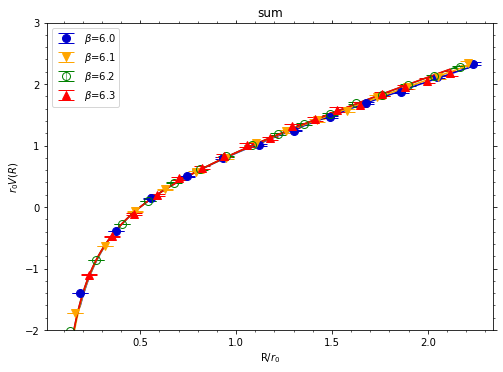

../../images/potential/together/su3/gluodynamics/beta_dependence/potential_mon_mod


In [3]:
path1 = '../../result/potential/wilson_loop/fundamental/su3/gluodynamics'
size = '24^4'
params = 'steps_500/copies=3'
compensate = 'compensate_1'
r_max = 18
T_max = 11
y_lims = (-2, 3)
constraints = {'r/a': (1, r_max), 'T': (1, T_max)}
paths = [{'beta': 6.0, 'fit_range': (2, 12),
        'data': {'original': {'name' : 'SU3', 'path' : f'{path1}/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential/potential_original.csv', 'constraints': {'r/a': (1, 12), 'T': (1, 12)}}, 
        'monopole': {'name' : 'mon', 'path' : f'{path1}/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/{params}/{compensate}/potential/potential_monopole.csv', 'T' : 11, 'constraints': {'r/a': (1, 12), 'T': (1, 12)}}, 
        'monopoless': {'name' : 'mod', 'path' : f'{path1}/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/{params}/{compensate}/potential/potential_monopoless.csv', 'T' : 8, 'constraints': {'r/a': (1, 12), 'T': (1, 12)}}}},
        {'beta': 6.1, 'fit_range': (2, 14),
        'data': {'original': {'name' : 'SU3', 'path' : f'{path1}/28^4/beta6.1/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential/potential_original.csv', 'constraints': {'r/a': (1, 14), 'T': (1, 13)}}, 
        'monopole': {'name' : 'mon', 'path' : f'{path1}/28^4/beta6.1/HYP0_alpha=1_1_0.5_APE_alpha=0.5/{params}/{compensate}/potential/potential_monopole.csv', 'T' : 11, 'constraints': {'r/a': (1, 14), 'T': (1, 13)}}, 
        'monopoless': {'name' : 'mod', 'path' : f'{path1}/28^4/beta6.1/HYP0_alpha=1_1_0.5_APE_alpha=0.5/{params}/{compensate}/potential/potential_monopoless.csv', 'T' : 8, 'constraints': {'r/a': (1, 14), 'T': (1, 13)}}}},
        {'beta': 6.2, 'constraints': {'r/a': (1, 16), 'T': (1, 15)}, 'fit_range': (2, 16),
        'data': {'original': {'name' : 'SU3', 'path' : f'{path1}/32^4/beta6.2/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential/potential_original.csv', 'constraints': {'r/a': (1, 16), 'T': (1, 15)}}, 
        'monopole': {'name' : 'mon', 'path' : f'{path1}/32^4/beta6.2/HYP0_alpha=1_1_0.5_APE_alpha=0.5/{params}/{compensate}/potential/potential_monopole.csv', 'T' : 11, 'constraints': {'r/a': (1, 16), 'T': (1, 15)}}, 
        'monopoless': {'name' : 'mod', 'path' : f'{path1}/32^4/beta6.2/HYP0_alpha=1_1_0.5_APE_alpha=0.5/{params}/{compensate}/potential/potential_monopoless.csv', 'T' : 8, 'constraints': {'r/a': (1, 16), 'T': (1, 15)}}}},
        {'beta': 6.3, 'constraints': {'r/a': (1, 18), 'T': (1, 17)}, 'fit_range': (2, 18),
        'data': {'original': {'name' : 'SU3', 'path' : f'{path1}/36^4/beta6.3/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential/potential_original.csv', 'constraints': {'r/a': (1, 18), 'T': (1, 17)}}, 
        'monopole': {'name' : 'mon', 'path' : f'{path1}/36^4/beta6.3/HYP0_alpha=1_1_0.5_APE_alpha=0.5/{params}/{compensate}/potential/potential_monopole.csv', 'T' : 11, 'constraints': {'r/a': (1, 18), 'T': (1, 17)}}, 
        'monopoless': {'name' : 'mod', 'path' : f'{path1}/36^4/beta6.3/HYP0_alpha=1_1_0.5_APE_alpha=0.5/{params}/{compensate}/potential/potential_monopoless.csv', 'T' : 8, 'constraints': {'r/a': (1, 18), 'T': (1, 17)}}}}]
fit_range = (2, 12)
remove_from_plot = ['original', 'monopole', 'monopoless']
term = 'mon+mod'

decomposition.potential_together_shifted(paths, f'../../images/potential/together/su3/gluodynamics/beta_dependence', f'potential_mon_mod', y_lims, False, remove_from_plot, False, term, 'sum')

5.367702622812138
SU3 [ 7.46324797e-05 -3.35192468e-01  4.65069380e-02]
[0.00112527 0.0016086  0.00017033]
6.336355747797897
SU3 [-0.00228358 -0.32820864  0.03341952]
[0.00231432 0.00346759 0.00031437]
7.382899148340123
SU3 [-0.00544294 -0.31899341  0.02488374]
[0.00083899 0.00137921 0.00010816]
8.513427304567733
SU3 [-0.00752557 -0.30920833  0.01883277]
[4.67066109e-04 7.45208912e-04 5.24307383e-05]


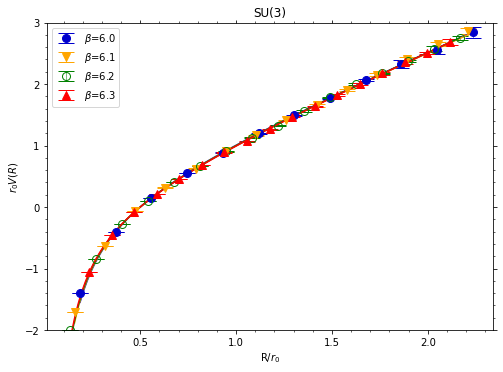

../../images/potential/together/su3/gluodynamics/beta_dependence/potential_original


In [7]:
path1 = '../../result/potential/wilson_loop/fundamental/su3/gluodynamics'
size = '24^4'
params = 'steps_500/copies=3'
compensate = 'compensate_1'
r_max = 12
T_max = 11
y_lims = (-2, 3)
constraints = {'r/a': (1, r_max), 'T': (1, T_max)}
paths = [{'beta': 6.0, 'fit_range': (2, 12), 'data': {'original': {'name' : 'SU3', 'path' : f'{path1}/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential/potential_original.csv', 'constraints': {'r/a': (1, 12), 'T': (1, 11)}}}},
        {'beta': 6.1, 'fit_range': (2, 14), 'data': {'original': {'name' : 'SU3', 'path' : f'{path1}/28^4/beta6.1/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential/potential_original.csv', 'constraints': {'r/a': (1, 14), 'T': (1, 13)}}}},
        {'beta': 6.2, 'fit_range': (2, 16), 'data': {'original': {'name' : 'SU3', 'path' : f'{path1}/32^4/beta6.2/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential/potential_original.csv', 'constraints': {'r/a': (1, 16), 'T': (1, 15)}}}},
        {'beta': 6.3, 'fit_range': (2, 18), 'data': {'original': {'name' : 'SU3', 'path' : f'{path1}/36^4/beta6.3/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential/potential_original.csv', 'constraints': {'r/a': (1, 18), 'T': (1, 17)}}}}]
fit_range = (2, r_max)
remove_from_plot = []
term = 'SU3'

decomposition.potential_together_shifted(paths, f'../../images/potential/together/su3/gluodynamics/beta_dependence', f'potential_original', y_lims, False, remove_from_plot, False, term, 'SU(3)')

aV(r)_SU2 0.09724598340307455 0.0024746015610866345 -0.2782058475791838 0.015848894736840338 0.001684471903558177 9.389510562535037e-05 chi_sq = -0.21935382387278998


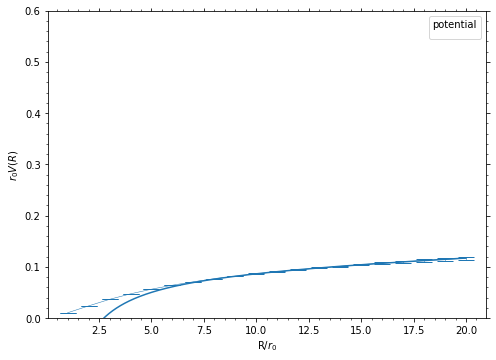

../../images/potential/decomposition/su2/qc2dstag/40^4/mu0.45/potential_fit


In [8]:
r_max = 20
constraints = {'r/a': (1, r_max)}
fit_range = (10, 20)
mu_arr = ['mu0.45']
paths = []
r0 = 9.8
y_lims = (0, 0.6)
for mu in mu_arr:
    path = f'../../result/potential/wilson_loop/fundamental/su2/qc2dstag/40^4/{mu}'
    paths.append({'name' : 'SU2', 'path' : f'{path}/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential/potential_monopole.csv', 'T': 15, 'constraints': constraints, })
decomposition.potentials_fit(paths, 'SU2', fit_range, r0, y_lims,  f'../../images/potential/decomposition/su2/qc2dstag/40^4/{mu}', 'potential_fit')

In [ ]:
r_max = 20
constraints = {'r/a': (1, r_max)}
fit_range = (5, 20)
mu_arr = ['mu0.35']
paths = []
r0 = 9.8
y_lims = (0, 0.6)
for mu in mu_arr:
    path = f'../../result/potential/wilson_loop/fundamental/su2/qc2dstag/40^4/{mu}'
    paths.append({'name' : 'SU2', 'path' : f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential/potential_monopole.csv', 'T': 15, 'constraints': constraints, })
decomposition.potentials_fit(paths, 'SU2', fit_range, r0, y_lims,  f'../../images/potential/decomposition/su2/qc2dstag/40^4/{mu}', 'potential_fit')

In [ ]:
r_max = 20
constraints = {'r/a': (1, r_max)}
fit_range = (3, 11)
mu_arr = ['mu0.35']
paths = []
r0 = 9.8
y_lims = (0, 0.6)
for mu in mu_arr:
    path = f'../../result/potential/wilson_loop/fundamental/su2/qc2dstag/40^4/{mu}'
    paths.append({'name' : 'SU2', 'path' : f'{path}/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential/potential_original.csv', 'constraints': constraints, })
decomposition.potentials_fit(paths, 'SU2', fit_range, r0, y_lims,  f'../../images/potential/decomposition/su2/qc2dstag/40^4/{mu}', 'potential_fit')

In [ ]:
r_max = 20
constraints = {'r/a': (1, r_max)}
fit_range = (5, 17)
mu_arr = ['mu0.00', 'mu0.05', 'mu0.20', 'mu0.25', 'mu0.30', 'mu0.35', 'mu0.40', 'mu0.45']
paths = []
r0 = 9.8
y_lims = (0, 0.6)
for mu in mu_arr:
    path = f'../../result/potential/wilson_loop/fundamental/su2/qc2dstag/40^4/{mu}'
    paths.append({'name' : 'SU2', 'path' : f'{path}/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential/potential_original.csv', 'constraints': constraints})
decomposition.potentials_fit(paths, 'SU2', fit_range, r0, y_lims,  f'../../images/potential/decomposition/su2/qc2dstag/40^4/{mu}', 'potential_fit')

In [ ]:
r_max = 17
constraints = {'r/a': (1, r_max)}
fit_range = (8, r_max)
mu_arr = ['mu0.40', 'mu0.45']
paths = []
r0 = 9.8
y_lims = (0, 0.6)
for mu in mu_arr:
    path = f'../../result/potential/wilson_loop/fundamental/su2/qc2dstag/40^4/{mu}'
    paths.append({'name' : 'SU2', 'path' : f'{path}/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential/potential_original.csv', 'constraints': constraints})
decomposition.potentials_fit(paths, 'SU2', fit_range, r0, y_lims,  f'../../images/potential/decomposition/su2/qc2dstag/40^4/{mu}', 'potential_fit')

In [23]:
def make_plot_decomposition_su2(path1, size, beta, beta_str, params, compensate, r_max, y_lims, representation):
    beta1 = beta_str.replace('.', 'p')
    path = f'{path1}/{size}/{beta_str}'
    constraints = {'r/a': (1, r_max)}
    paths = {'original': {'name' : 'SU2', 'path' : f'{path}/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential/potential_original.csv', 'T' : 8, 'constraints': constraints}, 
            'monopole': {'name' : 'monopole', 'path' : f'{path}/HYP1_alpha=1_1_0.5_APE_alpha=0.5/{params}/{compensate}/potential/potential_monopole.csv', 'T' : 8, 'constraints': constraints}, 
            'monopoless': {'name' : 'modified', 'path' : f'{path}/HYP1_alpha=1_1_0.5_APE_alpha=0.5/{params}/{compensate}/potential/potential_monopoless.csv', 'T' : 8, 'constraints': constraints},
            'abelian': {'name' : 'abel', 'path' : f'{path}/HYP1_alpha=1_1_0.5_APE_alpha=0.5/{params}/potential/potential_abelian.csv', 'T' : 8}, 
            'offdiagonal': {'name' : 'offdiag', 'path' : f'{path}/HYP1_alpha=1_1_0.5_APE_alpha=0.5/{params}/{compensate}/potential/potential_offdiagonal.csv', 'T' : 8}}
    r0 = 1/9.8
    fit_range = (3*r0, r_max*r0)
    remove_from_plot = []
    # decomposition.potential_decomposition(paths, f'../../images/potential/decomposition/su2/qc2dstag/{size}/{beta1}', f'potential_decomposition_full_fit_from_original_{size}_{beta1}', beta, y_lims, True, r0, fit_range, remove_from_plot, False)
#     decomposition.potential_decomposition(paths, f'../../images/potential/decomposition/su2/qc2dstag/{size}/{beta1}', f'potential_decomposition_full_fit_from_original_{size}_{beta1}_black', beta, y_lims, True, r0, fit_range, remove_from_plot, True)
#     decomposition.potential_decomposition(paths, f'../../images/potential/decomposition/su2/qc2dstag/{size}/{beta1}', f'potential_decomposition_full_fit_separate_{size}_{beta1}', beta, y_lims, False, r0, fit_range, remove_from_plot, False)
#     decomposition.potential_decomposition(paths, f'../../images/potential/decomposition/su2/qc2dstag/{size}/{beta1}', f'potential_decomposition_full_fit_separate_{size}_{beta1}_black', beta, y_lims, False, r0, fit_range, remove_from_plot, True)
#     remove_from_plot = ['monopole', 'monopoless']
#     decomposition.potential_decomposition(paths, f'../../images/potential/decomposition/su2/qc2dstag/{size}/{beta1}', f'potential_decomposition_full_mon_mod_removed_fit_from_original_{size}_{beta1}', beta, y_lims, True, r0, fit_range, remove_from_plot, False)
#     decomposition.potential_decomposition(paths, f'../../images/potential/decomposition/su2/qc2dstag/{size}/{beta1}', f'potential_decomposition_full_mon_mod_removed_fit_from_original_{size}_{beta1}_black', beta, y_lims, True, r0, fit_range, remove_from_plot, True)
#     decomposition.potential_decomposition(paths, f'../../images/potential/decomposition/su2/qc2dstag/{size}/{beta1}', f'potential_decomposition_full_mon_mod_removed_fit_separate_{size}_{beta1}', beta, y_lims, False, r0, fit_range, remove_from_plot, False)
#     decomposition.potential_decomposition(paths, f'../../images/potential/decomposition/su2/qc2dstag/{size}/{beta1}', f'potential_decomposition_full_mon_mod_removed_fit_separate_{size}_{beta1}_black', beta, y_lims, False, r0, fit_range, remove_from_plot, True)
    paths = {'original': {'name' : 'SU2', 'path' : f'{path}/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential/potential_original.csv', 'T': 6, 'constraints': constraints}, 
            'monopole': {'name' : 'monopole', 'path' : f'{path}/HYP1_alpha=1_1_0.5_APE_alpha=0.5/{params}/{compensate}/potential/potential_monopole.csv', 'T' : 12, 'constraints': constraints}, 
            'monopoless': {'name' : 'modified', 'path' : f'{path}/HYP1_alpha=1_1_0.5_APE_alpha=0.5/{params}/{compensate}/potential/potential_monopoless.csv', 'T' : 8, 'constraints': constraints}}
    remove_from_plot = []
    decomposition.potential_decomposition(paths, f'../../images/potential/{representation}/decomposition/su2/qc2dstag/{size}', f'potential_decomposition_mon_mod_fit_from_original_{size}_{beta1}', beta, y_lims, True, r0, fit_range, remove_from_plot, False)
#     decomposition.potential_decomposition(paths, f'../../images/potential/decomposition/su2/qc2dstag/{size}/{beta1}', f'potential_decomposition_mon_mod_fit_from_original_{size}_{beta1}_black', beta, y_lims, True, r0, fit_range, remove_from_plot, True)
    decomposition.potential_decomposition(paths, f'../../images/potential/{representation}/decomposition/su2/qc2dstag/{size}', f'potential_decomposition_mon_mod_fit_separate_{size}_{beta1}', beta, y_lims, False, r0, fit_range, remove_from_plot, False)
#     decomposition.potential_decomposition(paths, f'../../images/potential/decomposition/su2/qc2dstag/{size}/{beta1}', f'potential_decomposition_mon_mod_fit_separate_{size}_{beta1}_black', beta, y_lims, False, r0, fit_range, remove_from_plot, True)

In [ ]:
make_plot_decomposition_su2('../../result/potential/wilson_loop/adjoint/su2/su2_suzuki', '48^4', 2.8, 'beta2.8', 'T_step=0.0002', '/', 24, (-0.1, 2))

In [ ]:
make_plot_decomposition_su2('../../result/potential/wilson_loop/fundamental/su2/su2_suzuki', '48^4', 2.6, 'beta2.6', 'T_step=0.01', '/', 24, (-0.03, 0.75))

In [ ]:
params = ['T_step=0.0001', 'T_step=0.0002', 'T_step=0.0004', 'T_step=0.0008', 'T_step=0.0016', 'T_step=0.0032']
for p in params:
    make_plot_decomposition_su2('../../result/potential/wilson_loop/fundamental/su2/su2_suzuki', '48^4', 2.7, 'beta2.7', p, '/', 24, (-0.03, 0.61))

In [ ]:
params = ['T_step=0.0001', 'T_step=0.0002', 'T_step=0.0004', 'T_step=0.0008', 'T_step=0.001', 'T_step=0.002', 'T_step=0.004', 'T_step=0.008', 'T_step=5e-05']
for p in params:
    print(p)
    make_plot_decomposition_su2('../../result/potential/wilson_loop/fundamental/su2/su2_suzuki', '48^4', 2.8, 'beta2.8', p, '/', 24, (-0.03, 0.61))

In [ ]:
params = ['T_step=0.0001', 'T_step=0.0002', 'T_step=0.0004', 'T_step=0.0008', 'T_step=0.0016', 'T_step=0.0032']
for p in params:
    make_plot_decomposition_su2('../../result/potential/wilson_loop/fundamental/su2/su2_suzuki', '48^4', 2.6, 'beta2.7', p, '/', 24, (-0.03, 0.61))

mu0.00
{'aV(r)_SU2': array([ 2.24472133, -0.34736626,  1.39934253]), 'err_SU2': array([0.01730047, 0.00396683, 0.01668562]), 'aV(r)_monopole': (array([0.27535076]), 0, 1.3993425330452125), 'err_monopole': (0.032956472568010035, 0, 0.016685615313162417), 'aV(r)_modified': (array([1.98147561]), -0.34736626469240983, 0), 'err_modified': (0.09907637083214738, 0.003966825691896602, 0), 'aV(r)_monopole+modified': array([ 1.97066951, -0.27476912,  1.5024798 ]), 'err_monopole+modified': array([0.00228808, 0.00052319, 0.00223314])}


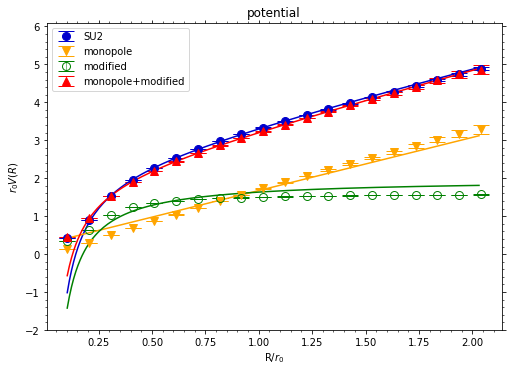

../../images/potential/fundamental/decomposition/su2/qc2dstag/40^4/potential_decomposition_mon_mod_fit_from_original_40^4_mu0p00
{'aV(r)_SU2': array([ 2.24472133, -0.34736626,  1.39934253]), 'err_SU2': array([0.01730047, 0.00396683, 0.01668562]), 'aV(r)_monopole': array([ 0.07919181, -0.02653532,  1.64071761]), 'err_monopole': array([0.01160478, 0.00262271, 0.01154292]), 'aV(r)_modified': array([ 1.81685892, -0.23071178, -0.0735739 ]), 'err_modified': array([0.01240532, 0.00354244, 0.00767565]), 'aV(r)_monopole+modified': array([ 1.97066951, -0.27476912,  1.5024798 ]), 'err_monopole+modified': array([0.00228808, 0.00052319, 0.00223314])}


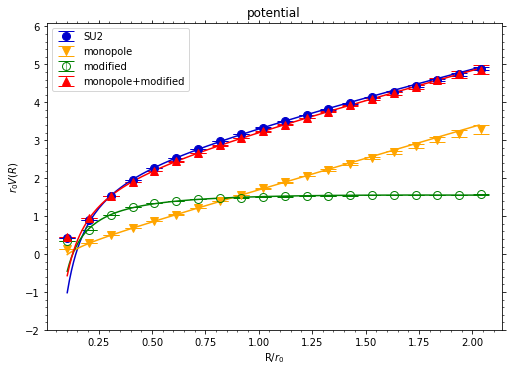

../../images/potential/fundamental/decomposition/su2/qc2dstag/40^4/potential_decomposition_mon_mod_fit_separate_40^4_mu0p00
mu0.05
{'aV(r)_SU2': array([ 2.24214851, -0.34663067,  1.39542488]), 'err_SU2': array([0.01570046, 0.0036254 , 0.01494944]), 'aV(r)_monopole': (array([0.26810803]), 0, 1.3954248823176416), 'err_monopole': (0.03287090770716146, 0, 0.014949441265870252), 'aV(r)_modified': (array([1.98076175]), -0.34663066700539114, 0), 'err_modified': (0.09869631617073177, 0.00362540187595125, 0), 'aV(r)_monopole+modified': array([ 1.95309913, -0.27084313,  1.50106564]), 'err_monopole+modified': array([0.00241692, 0.00055663, 0.00233297])}


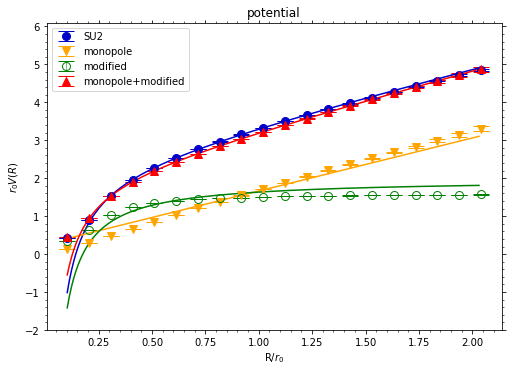

../../images/potential/fundamental/decomposition/su2/qc2dstag/40^4/potential_decomposition_mon_mod_fit_from_original_40^4_mu0p05
{'aV(r)_SU2': array([ 2.24214851, -0.34663067,  1.39542488]), 'err_SU2': array([0.01570046, 0.0036254 , 0.01494944]), 'aV(r)_monopole': array([ 0.06236791, -0.02292885,  1.63793901]), 'err_monopole': array([0.00914425, 0.00208174, 0.00899295]), 'aV(r)_modified': array([ 1.81802916, -0.23079738, -0.0740451 ]), 'err_modified': array([0.01251098, 0.0035752 , 0.00779169]), 'aV(r)_monopole+modified': array([ 1.95309913, -0.27084313,  1.50106564]), 'err_monopole+modified': array([0.00241692, 0.00055663, 0.00233297])}


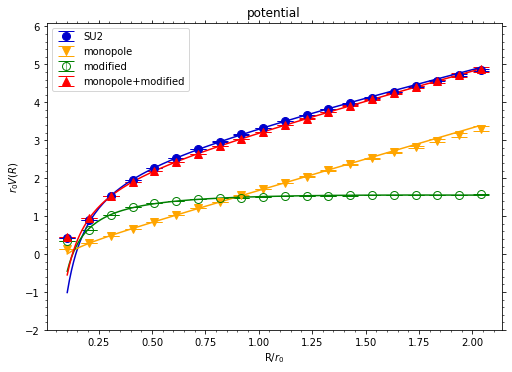

../../images/potential/fundamental/decomposition/su2/qc2dstag/40^4/potential_decomposition_mon_mod_fit_separate_40^4_mu0p05
mu0.20
{'aV(r)_SU2': array([ 2.08192765, -0.32077609,  1.68538184]), 'err_SU2': array([0.00939412, 0.0020877 , 0.00953445]), 'aV(r)_monopole': (array([0.2318952]), 0, 1.6853818355974333), 'err_monopole': (0.033398861427853, 0, 0.009534451900561026), 'aV(r)_modified': (array([1.91148695]), -0.32077609318831807, 0), 'err_modified': (0.08779113137624434, 0.002087695670797478, 0), 'aV(r)_monopole+modified': array([ 1.8543844 , -0.25701429,  1.82284164]), 'err_monopole+modified': array([0.01048134, 0.00232702, 0.01070783])}


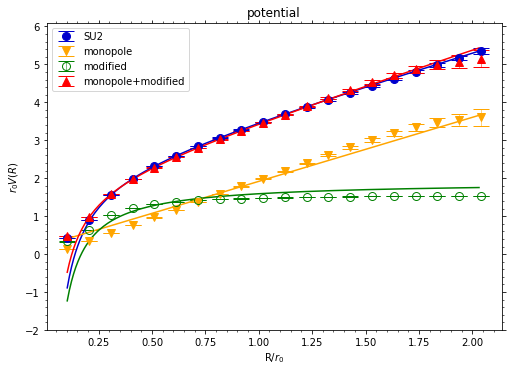

../../images/potential/fundamental/decomposition/su2/qc2dstag/40^4/potential_decomposition_mon_mod_fit_from_original_40^4_mu0p20
{'aV(r)_SU2': array([ 2.08192765, -0.32077609,  1.68538184]), 'err_SU2': array([0.00939412, 0.0020877 , 0.00953445]), 'aV(r)_monopole': array([-0.0217818 , -0.01119704,  1.97745619]), 'err_monopole': array([0.0081015 , 0.00177892, 0.00841981]), 'aV(r)_modified': array([ 1.78837505, -0.22555787, -0.07567056]), 'err_modified': array([0.01290577, 0.00367582, 0.00798912]), 'aV(r)_monopole+modified': array([ 1.8543844 , -0.25701429,  1.82284164]), 'err_monopole+modified': array([0.01048134, 0.00232702, 0.01070783])}


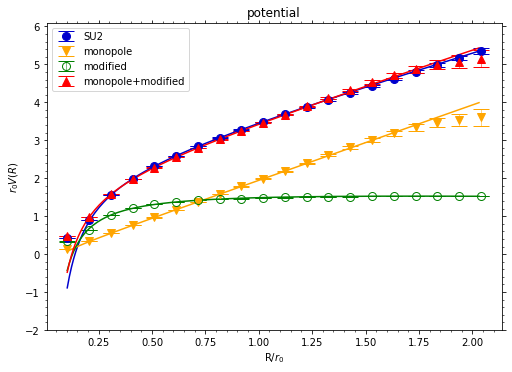

../../images/potential/fundamental/decomposition/su2/qc2dstag/40^4/potential_decomposition_mon_mod_fit_separate_40^4_mu0p20
mu0.25
{'aV(r)_SU2': array([ 2.05067888, -0.31607521,  1.75540722]), 'err_SU2': array([0.00753837, 0.00167446, 0.00766493]), 'aV(r)_monopole': (array([0.13883478]), 0, 1.755407215895378), 'err_monopole': (0.031135336531698064, 0, 0.007664930353708428), 'aV(r)_modified': (array([1.90234838]), -0.3160752130169259, 0), 'err_modified': (0.08565037582375336, 0.0016744644664178343, 0), 'aV(r)_monopole+modified': array([ 1.87778663, -0.25897594,  1.71826836]), 'err_monopole+modified': array([0.01294725, 0.00290651, 0.01299258])}


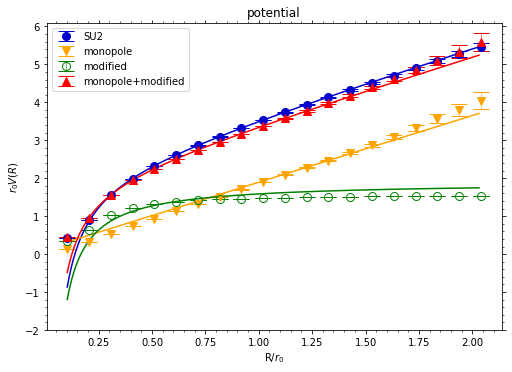

../../images/potential/fundamental/decomposition/su2/qc2dstag/40^4/potential_decomposition_mon_mod_fit_from_original_40^4_mu0p25
{'aV(r)_SU2': array([ 2.05067888, -0.31607521,  1.75540722]), 'err_SU2': array([0.00753837, 0.00167446, 0.00766493]), 'aV(r)_monopole': array([ 0.00707133, -0.01518192,  1.87112673]), 'err_monopole': array([0.00739861, 0.00164389, 0.00754477]), 'aV(r)_modified': array([ 1.78240341, -0.22338587, -0.07357317]), 'err_modified': array([0.01329418, 0.00379137, 0.00825881]), 'aV(r)_monopole+modified': array([ 1.87778663, -0.25897594,  1.71826836]), 'err_monopole+modified': array([0.01294725, 0.00290651, 0.01299258])}


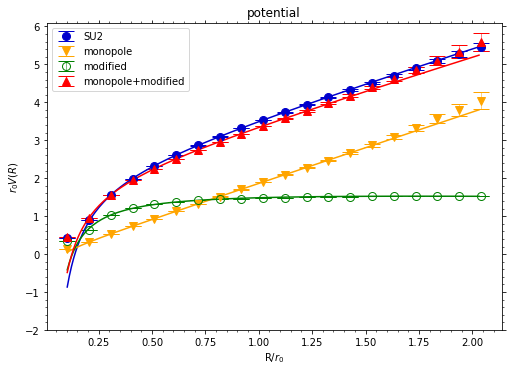

../../images/potential/fundamental/decomposition/su2/qc2dstag/40^4/potential_decomposition_mon_mod_fit_separate_40^4_mu0p25
mu0.30
{'aV(r)_SU2': array([ 2.10954234, -0.32460069,  1.63866949]), 'err_SU2': array([0.00945291, 0.00209783, 0.00958502]), 'aV(r)_monopole': (array([0.35368859]), 0, 1.6386694878160866), 'err_monopole': (0.05150467194541877, 0, 0.009585021951284549), 'aV(r)_modified': (array([1.90053202]), -0.3246006900597465, 0), 'err_modified': (0.0908776580673394, 0.0020978294799897405, 0), 'aV(r)_monopole+modified': array([ 1.88321719, -0.2618038 ,  1.80995323]), 'err_monopole+modified': array([0.00509437, 0.00112739, 0.00522417])}


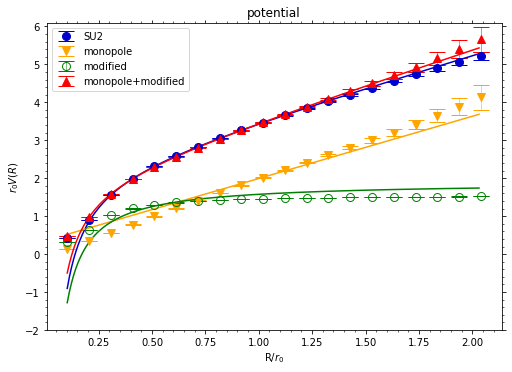

../../images/potential/fundamental/decomposition/su2/qc2dstag/40^4/potential_decomposition_mon_mod_fit_from_original_40^4_mu0p30
{'aV(r)_SU2': array([ 2.10954234, -0.32460069,  1.63866949]), 'err_SU2': array([0.00945291, 0.00209783, 0.00958502]), 'aV(r)_monopole': array([ 0.02448718, -0.01992011,  1.97322152]), 'err_monopole': array([0.00757155, 0.00165885, 0.00788209]), 'aV(r)_modified': array([ 1.75640193, -0.21807288, -0.07244634]), 'err_modified': array([0.01411241, 0.00407637, 0.00859335]), 'aV(r)_monopole+modified': array([ 1.88321719, -0.2618038 ,  1.80995323]), 'err_monopole+modified': array([0.00509437, 0.00112739, 0.00522417])}


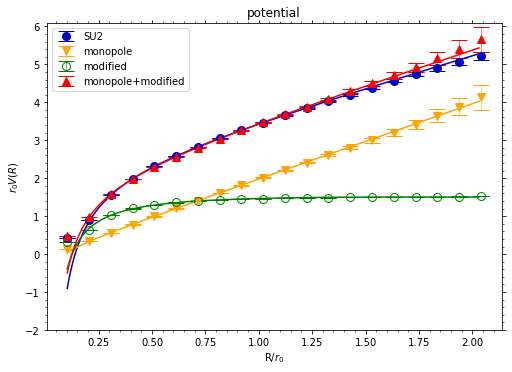

../../images/potential/fundamental/decomposition/su2/qc2dstag/40^4/potential_decomposition_mon_mod_fit_separate_40^4_mu0p30
mu0.35
{'aV(r)_SU2': array([ 2.18775987, -0.33497237,  1.45968254]), 'err_SU2': array([0.01024662, 0.00227089, 0.0104372 ]), 'aV(r)_monopole': (array([0.24469692]), 0, 1.4596825437909604), 'err_monopole': (0.024637024601781955, 0, 0.010437204060125582), 'aV(r)_modified': (array([1.91000395]), -0.3349723745107119, 0), 'err_modified': (0.09673015612438934, 0.00227088914264756, 0), 'aV(r)_monopole+modified': array([ 2.01102921, -0.28075024,  1.47242772]), 'err_monopole+modified': array([0.0084291 , 0.00190083, 0.0084174 ])}


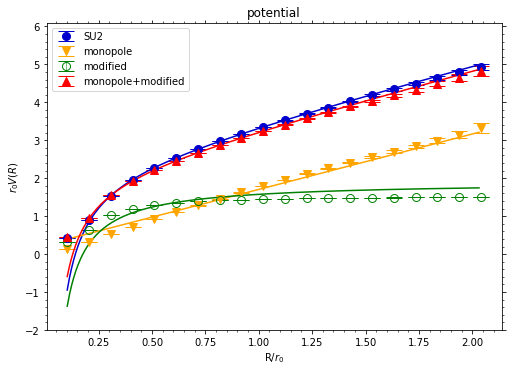

../../images/potential/fundamental/decomposition/su2/qc2dstag/40^4/potential_decomposition_mon_mod_fit_from_original_40^4_mu0p35
{'aV(r)_SU2': array([ 2.18775987, -0.33497237,  1.45968254]), 'err_SU2': array([0.01024662, 0.00227089, 0.0104372 ]), 'aV(r)_monopole': array([ 0.15940722, -0.04142983,  1.63900885]), 'err_monopole': array([0.0203151 , 0.00452581, 0.02067423]), 'aV(r)_modified': array([ 1.75241718, -0.21615378, -0.07936812]), 'err_modified': array([0.01485216, 0.00425116, 0.00923702]), 'aV(r)_monopole+modified': array([ 2.01102921, -0.28075024,  1.47242772]), 'err_monopole+modified': array([0.0084291 , 0.00190083, 0.0084174 ])}


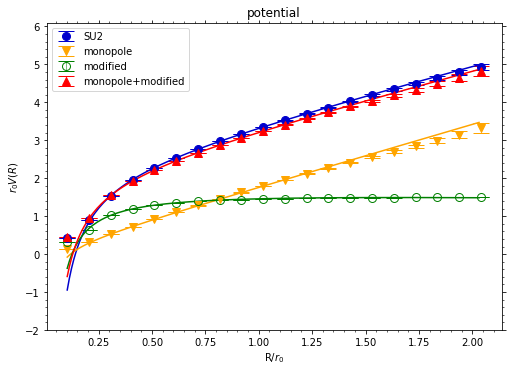

../../images/potential/fundamental/decomposition/su2/qc2dstag/40^4/potential_decomposition_mon_mod_fit_separate_40^4_mu0p35
mu0.40
{'aV(r)_SU2': array([ 2.29404796, -0.34027234,  1.03768766]), 'err_SU2': array([0.01074821, 0.00244504, 0.01050545]), 'aV(r)_monopole': (array([0.36818947]), 0, 1.0376876649305145), 'err_monopole': (0.030848955024932297, 0, 0.010505450298530037), 'aV(r)_modified': (array([1.90533583]), -0.34027233839833054, 0), 'err_modified': (0.10041483818140541, 0.002445040775041172, 0), 'aV(r)_monopole+modified': array([ 2.17943483, -0.30512221,  1.04174548]), 'err_monopole+modified': array([0.01629962, 0.0038186 , 0.01527125])}


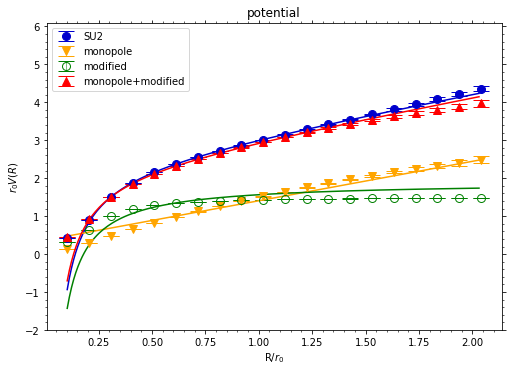

../../images/potential/fundamental/decomposition/su2/qc2dstag/40^4/potential_decomposition_mon_mod_fit_from_original_40^4_mu0p40
{'aV(r)_SU2': array([ 2.29404796, -0.34027234,  1.03768766]), 'err_SU2': array([0.01074821, 0.00244504, 0.01050545]), 'aV(r)_monopole': array([ 0.35796709, -0.07284894,  1.19741837]), 'err_monopole': array([0.02962774, 0.00687676, 0.02820468]), 'aV(r)_modified': array([ 1.73355702, -0.21145867, -0.08097826]), 'err_modified': array([0.01525233, 0.00436087, 0.00939048]), 'aV(r)_monopole+modified': array([ 2.17943483, -0.30512221,  1.04174548]), 'err_monopole+modified': array([0.01629962, 0.0038186 , 0.01527125])}


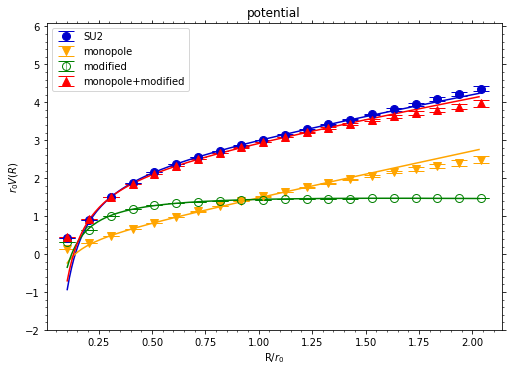

../../images/potential/fundamental/decomposition/su2/qc2dstag/40^4/potential_decomposition_mon_mod_fit_separate_40^4_mu0p40
mu0.45
{'aV(r)_SU2': array([ 2.42407851, -0.33272007,  0.15674026]), 'err_SU2': array([0.021162  , 0.00513483, 0.01843706]), 'aV(r)_monopole': (array([0.68788812]), 0, 0.156740260551342), 'err_monopole': (0.06134637340383174, 0, 0.018437064183535096), 'aV(r)_modified': (array([1.87192807]), -0.33272006989913827, 0), 'err_modified': (0.09872492360177497, 0.005134829547076857, 0), 'aV(r)_monopole+modified': array([ 2.25470566, -0.30083779,  0.33691735]), 'err_monopole+modified': array([0.00139198, 0.00035273, 0.00113228])}


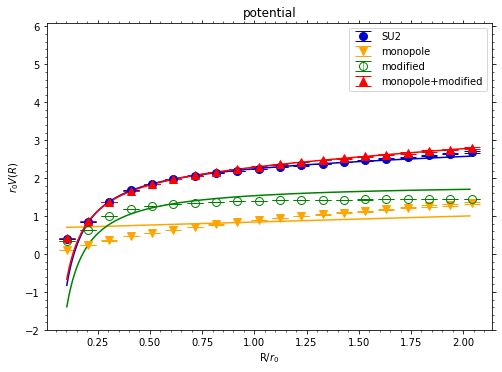

../../images/potential/fundamental/decomposition/su2/qc2dstag/40^4/potential_decomposition_mon_mod_fit_from_original_40^4_mu0p45
{'aV(r)_SU2': array([ 2.42407851, -0.33272007,  0.15674026]), 'err_SU2': array([0.021162  , 0.00513483, 0.01843706]), 'aV(r)_monopole': array([ 0.49287386, -0.0853029 ,  0.46679402]), 'err_monopole': array([0.01789759, 0.00450226, 0.01473516]), 'aV(r)_modified': array([ 1.69641079, -0.19902384, -0.08083121]), 'err_modified': array([0.01817418, 0.00533451, 0.01106044]), 'aV(r)_monopole+modified': array([ 2.25470566, -0.30083779,  0.33691735]), 'err_monopole+modified': array([0.00139198, 0.00035273, 0.00113228])}


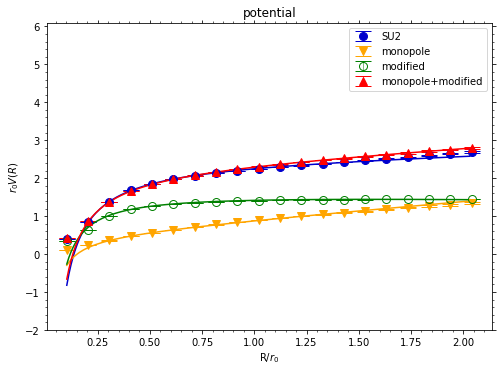

../../images/potential/fundamental/decomposition/su2/qc2dstag/40^4/potential_decomposition_mon_mod_fit_separate_40^4_mu0p45


In [24]:
for mu in ['mu0.00', 'mu0.05', 'mu0.20', 'mu0.25', 'mu0.30', 'mu0.35', 'mu0.40', 'mu0.45']:
    print(mu)
    make_plot_decomposition_su2('../../result/potential/wilson_loop/fundamental/su2/qc2dstag', '40^4', 1, mu, '/', '/', 20, (-2, 6.1), 'fundamental')

mu0.00
{'aV(r)_SU2': array([ 5.74624295, -0.87331032,  3.72593381]), 'err_SU2': array([0.0948605 , 0.01875995, 0.11368114]), 'aV(r)_monopole': (array([-0.06767141]), 0, 3.7259338068648375), 'err_monopole': (0.014204263141462793, 0, 0.11368113635167691), 'aV(r)_modified': (array([5.38608435]), -0.8733103228693508, 0), 'err_modified': (0.3900711653936081, 0.018759946619558505, 0), 'aV(r)_monopole+modified': array([ 5.4009639 , -0.72554213,  2.65376676]), 'err_monopole+modified': array([0.02655402, 0.00537368, 0.03093051])}


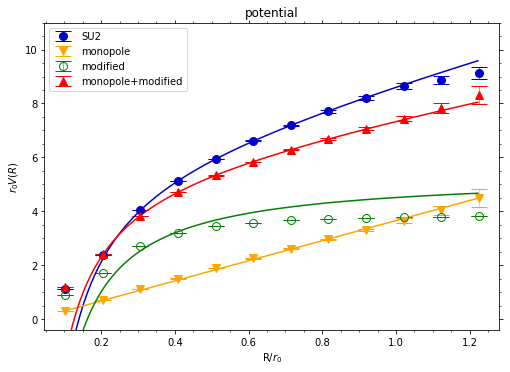

../../images/potential/adjoint/decomposition/su2/qc2dstag/40^4/potential_decomposition_mon_mod_fit_from_original_40^4_mu0p00
{'aV(r)_SU2': array([ 5.74624295, -0.87331032,  3.72593381]), 'err_SU2': array([0.0948605 , 0.01875995, 0.11368114]), 'aV(r)_monopole': array([ 0.23665036, -0.05114496,  3.42669442]), 'err_monopole': array([0.02263991, 0.00453162, 0.0267848 ]), 'aV(r)_modified': array([ 4.92460154, -0.62435518, -0.5148176 ]), 'err_modified': array([0.05396881, 0.01324127, 0.04508157]), 'aV(r)_monopole+modified': array([ 5.4009639 , -0.72554213,  2.65376676]), 'err_monopole+modified': array([0.02655402, 0.00537368, 0.03093051])}


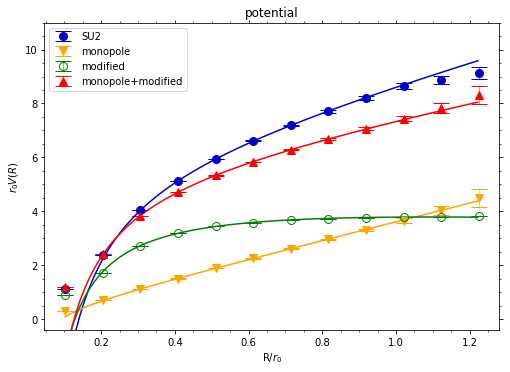

../../images/potential/adjoint/decomposition/su2/qc2dstag/40^4/potential_decomposition_mon_mod_fit_separate_40^4_mu0p00
mu0.05
{'aV(r)_SU2': array([ 5.9973538 , -0.91713358,  3.36210159]), 'err_SU2': array([0.0858168 , 0.01700175, 0.10276529]), 'aV(r)_monopole': (array([0.13657258]), 0, 3.362101587696526), 'err_monopole': (0.024159401007761504, 0, 0.10276529082288252), 'aV(r)_modified': (array([5.49923438]), -0.9171335766431489, 0), 'err_modified': (0.42204061716991076, 0.017001746661678897, 0), 'aV(r)_monopole+modified': array([ 5.31799034, -0.71073126,  2.73071671]), 'err_monopole+modified': array([0.02354618, 0.00479998, 0.02714569])}


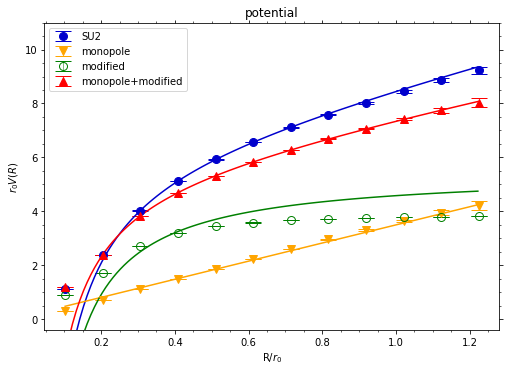

../../images/potential/adjoint/decomposition/su2/qc2dstag/40^4/potential_decomposition_mon_mod_fit_from_original_40^4_mu0p05
{'aV(r)_SU2': array([ 5.9973538 , -0.91713358,  3.36210159]), 'err_SU2': array([0.0858168 , 0.01700175, 0.10276529]), 'aV(r)_monopole': array([ 0.17003052, -0.03972255,  3.48243729]), 'err_monopole': array([0.02373498, 0.00478296, 0.02781679]), 'aV(r)_modified': array([ 4.92495753, -0.62429176, -0.5128027 ]), 'err_modified': array([0.05287291, 0.01296856, 0.04442817]), 'aV(r)_monopole+modified': array([ 5.31799034, -0.71073126,  2.73071671]), 'err_monopole+modified': array([0.02354618, 0.00479998, 0.02714569])}


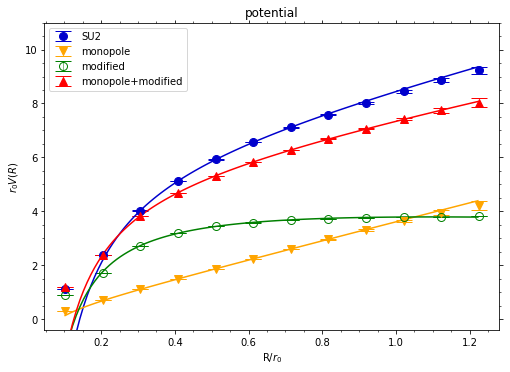

../../images/potential/adjoint/decomposition/su2/qc2dstag/40^4/potential_decomposition_mon_mod_fit_separate_40^4_mu0p05
mu0.20
{'aV(r)_SU2': array([ 5.61995279, -0.85922431,  4.08006751]), 'err_SU2': array([0.08370336, 0.01623941, 0.10309041]), 'aV(r)_monopole': (array([-0.00985354]), 0, 4.080067512764428), 'err_monopole': (0.013193471245156498, 0, 0.1030904051307872), 'aV(r)_modified': (array([5.2993146]), -0.8592243056514038, 0), 'err_modified': (0.3851735515865768, 0.016239413660908326, 0), 'aV(r)_monopole+modified': array([ 5.18816521, -0.69344509,  3.25625245]), 'err_monopole+modified': array([0.03476216, 0.00686014, 0.04189806])}


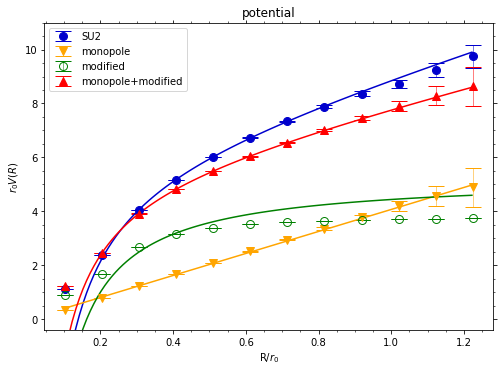

../../images/potential/adjoint/decomposition/su2/qc2dstag/40^4/potential_decomposition_mon_mod_fit_from_original_40^4_mu0p20
{'aV(r)_SU2': array([ 5.61995279, -0.85922431,  4.08006751]), 'err_SU2': array([0.08370336, 0.01623941, 0.10309041]), 'aV(r)_monopole': array([ 0.05955275, -0.02460933,  4.08053218]), 'err_monopole': array([0.00893786, 0.00174794, 0.01090542]), 'aV(r)_modified': array([ 4.8548701 , -0.61206973, -0.52583369]), 'err_modified': array([0.05573524, 0.01368098, 0.04670267]), 'aV(r)_monopole+modified': array([ 5.18816521, -0.69344509,  3.25625245]), 'err_monopole+modified': array([0.03476216, 0.00686014, 0.04189806])}


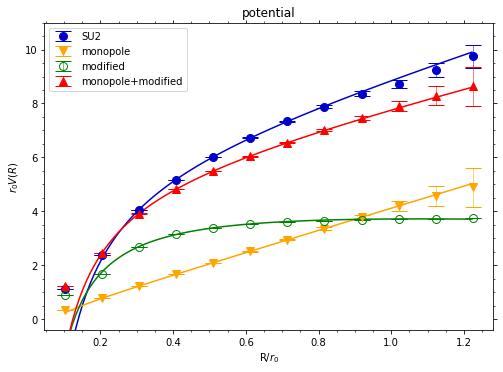

../../images/potential/adjoint/decomposition/su2/qc2dstag/40^4/potential_decomposition_mon_mod_fit_separate_40^4_mu0p20
mu0.25
{'aV(r)_SU2': array([ 5.82681716, -0.89279207,  3.79216567]), 'err_SU2': array([0.05313858, 0.01028458, 0.06560056]), 'aV(r)_monopole': (array([-0.05299849]), 0, 3.7921656727224518), 'err_monopole': (0.06794578763351034, 0, 0.0656005551723159), 'aV(r)_modified': (array([5.38054312]), -0.8927920671176692, 0), 'err_modified': (0.41063484628802854, 0.010284578262328797, 0), 'aV(r)_monopole+modified': array([ 5.3672075 , -0.72059167,  2.85461024]), 'err_monopole+modified': array([0.04146359, 0.00826913, 0.04930726])}


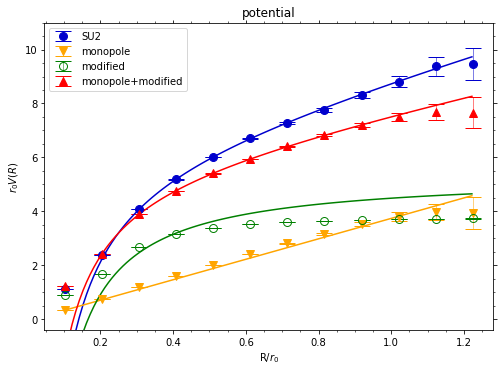

../../images/potential/adjoint/decomposition/su2/qc2dstag/40^4/potential_decomposition_mon_mod_fit_from_original_40^4_mu0p25
{'aV(r)_SU2': array([ 5.82681716, -0.89279207,  3.79216567]), 'err_SU2': array([0.05313858, 0.01028458, 0.06560056]), 'aV(r)_monopole': array([ 0.25025021, -0.05691441,  3.68425287]), 'err_monopole': array([0.06075457, 0.0119973 , 0.07323812]), 'aV(r)_modified': array([ 4.8274395 , -0.60359549, -0.51432392]), 'err_modified': array([0.05892621, 0.01446394, 0.04948286]), 'aV(r)_monopole+modified': array([ 5.3672075 , -0.72059167,  2.85461024]), 'err_monopole+modified': array([0.04146359, 0.00826913, 0.04930726])}


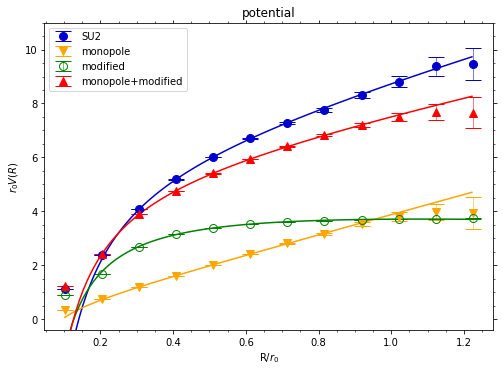

../../images/potential/adjoint/decomposition/su2/qc2dstag/40^4/potential_decomposition_mon_mod_fit_separate_40^4_mu0p25
mu0.30
{'aV(r)_SU2': array([ 5.87670696, -0.89792601,  3.63787661]), 'err_SU2': array([0.05467307, 0.0106019 , 0.06726085]), 'aV(r)_monopole': (array([0.25024895]), 0, 3.637876612163317), 'err_monopole': (0.045740313174736834, 0, 0.06726084699812697), 'aV(r)_modified': (array([5.36423226]), -0.8979260073609875, 0), 'err_modified': (0.4173186720043183, 0.010601896272544662, 0), 'aV(r)_monopole+modified': array([ 5.3629199 , -0.72145748,  3.01954679]), 'err_monopole+modified': array([0.01904235, 0.0037664 , 0.02285972])}


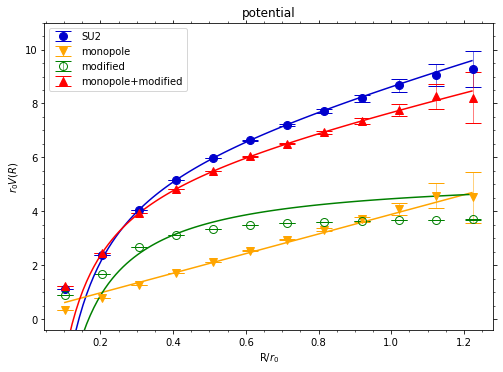

../../images/potential/adjoint/decomposition/su2/qc2dstag/40^4/potential_decomposition_mon_mod_fit_from_original_40^4_mu0p30
{'aV(r)_SU2': array([ 5.87670696, -0.89792601,  3.63787661]), 'err_SU2': array([0.05467307, 0.0106019 , 0.06726085]), 'aV(r)_monopole': array([ 0.28852674, -0.06399781,  3.85132749]), 'err_monopole': array([0.0393099 , 0.00771404, 0.0476924 ]), 'aV(r)_modified': array([ 4.76987422, -0.59398361, -0.50259898]), 'err_modified': array([0.05945191, 0.01471288, 0.04899381]), 'aV(r)_monopole+modified': array([ 5.3629199 , -0.72145748,  3.01954679]), 'err_monopole+modified': array([0.01904235, 0.0037664 , 0.02285972])}


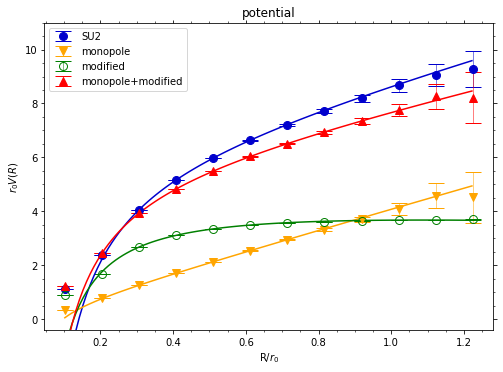

../../images/potential/adjoint/decomposition/su2/qc2dstag/40^4/potential_decomposition_mon_mod_fit_separate_40^4_mu0p30
mu0.35
{'aV(r)_SU2': array([ 6.25134232, -0.95412947,  2.92230153]), 'err_SU2': array([0.09827307, 0.01895801, 0.12173546]), 'aV(r)_monopole': (array([0.43796252]), 0, 2.922301530162104), 'err_monopole': (0.06087914498717685, 0, 0.12173545768798355), 'aV(r)_modified': (array([5.49354007]), -0.9541294683380831, 0), 'err_modified': (0.4609184175515007, 0.018958007745107967, 0), 'aV(r)_monopole+modified': array([ 5.45206688, -0.72690578,  2.50719175]), 'err_monopole+modified': array([0.03203507, 0.00641023, 0.0378708 ])}


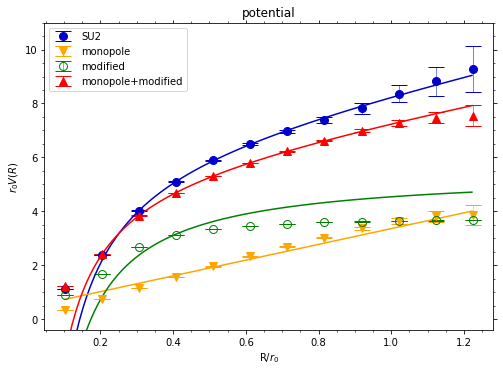

../../images/potential/adjoint/decomposition/su2/qc2dstag/40^4/potential_decomposition_mon_mod_fit_from_original_40^4_mu0p35
{'aV(r)_SU2': array([ 6.25134232, -0.95412947,  2.92230153]), 'err_SU2': array([0.09827307, 0.01895801, 0.12173546]), 'aV(r)_monopole': array([ 0.38705029, -0.07421984,  3.35672979]), 'err_monopole': array([0.04924087, 0.00975202, 0.05903279]), 'aV(r)_modified': array([ 4.75856052, -0.5886697 , -0.51946294]), 'err_modified': array([0.06406226, 0.01580278, 0.05326463]), 'aV(r)_monopole+modified': array([ 5.45206688, -0.72690578,  2.50719175]), 'err_monopole+modified': array([0.03203507, 0.00641023, 0.0378708 ])}


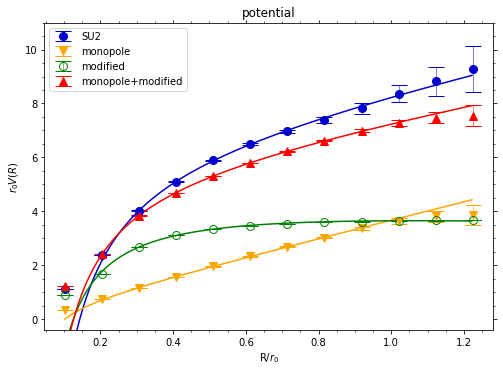

../../images/potential/adjoint/decomposition/su2/qc2dstag/40^4/potential_decomposition_mon_mod_fit_separate_40^4_mu0p35
mu0.45
{'aV(r)_SU2': array([ 6.67217302, -0.93592146,  0.04866941]), 'err_SU2': array([0.04107834, 0.0087281 , 0.04432486]), 'aV(r)_monopole': (array([1.26306501]), 0, 0.04866940884383294), 'err_monopole': (0.15522657089747516, 0, 0.04432486387803217), 'aV(r)_modified': (array([5.43983123]), -0.9359214616600592, 0), 'err_modified': (0.4489882391706641, 0.008728096510330411, 0), 'aV(r)_monopole+modified': array([ 5.81029735, -0.75346312,  0.36435881]), 'err_monopole+modified': array([0.02241308, 0.00498788, 0.02274806])}


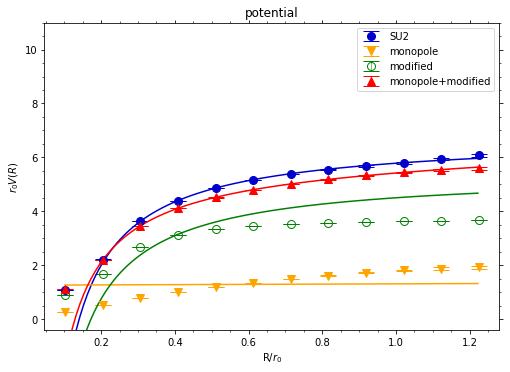

../../images/potential/adjoint/decomposition/su2/qc2dstag/40^4/potential_decomposition_mon_mod_fit_from_original_40^4_mu0p45
{'aV(r)_SU2': array([ 6.67217302, -0.93592146,  0.04866941]), 'err_SU2': array([0.04107834, 0.0087281 , 0.04432486]), 'aV(r)_monopole': array([ 0.96462655, -0.14976309,  1.00356241]), 'err_monopole': array([0.06595437, 0.01451012, 0.06820017]), 'aV(r)_modified': array([ 4.67518029, -0.56642743, -0.4697114 ]), 'err_modified': array([0.06755666, 0.0168493 , 0.05543947]), 'aV(r)_monopole+modified': array([ 5.81029735, -0.75346312,  0.36435881]), 'err_monopole+modified': array([0.02241308, 0.00498788, 0.02274806])}


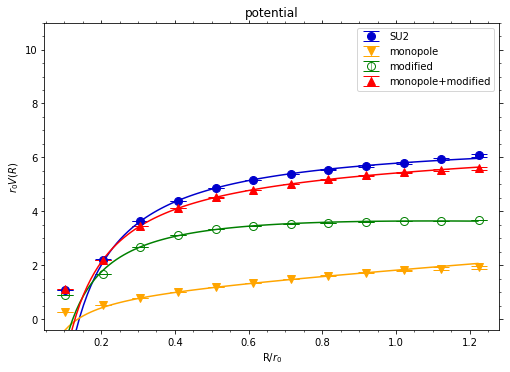

../../images/potential/adjoint/decomposition/su2/qc2dstag/40^4/potential_decomposition_mon_mod_fit_separate_40^4_mu0p45


In [20]:
for mu in ['mu0.00', 'mu0.05', 'mu0.20', 'mu0.25', 'mu0.30', 'mu0.35', 'mu0.45']:
    print(mu)
    make_plot_decomposition_su2('../../result/potential/wilson_loop/adjoint/su2/qc2dstag', '40^4', 1, mu, '/', '/', 12, (-0.4, 11), 'adjoint')

In [20]:
def make_plot_decomposition(path1, size, beta, beta_str, params, compensate, r_max, T_max, y_lims):
    beta1 = beta_str.replace('.', 'p')
    path = f'{path1}/{size}/{beta_str}'
    constraints = {'r/a': (1, r_max), 'T': (1, T_max)}
    paths = {'original': {'name' : 'SU3', 'path' : f'{path}/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential/potential_original.csv', 'constraints': constraints}, 
            'monopole': {'name' : 'mon', 'path' : f'{path}/HYP1_alpha=1_1_0.5_APE_alpha=0.5/{params}/{compensate}/potential/potential_monopole.csv', 'T' : 11, 'constraints': constraints}, 
            'monopoless': {'name' : 'mod', 'path' : f'{path}/HYP1_alpha=1_1_0.5_APE_alpha=0.5/{params}/{compensate}/potential/potential_monopoless.csv', 'T' : 8, 'constraints': constraints},
            'abelian': {'name' : 'abel', 'path' : f'{path}/HYP1_alpha=1_1_0.5_APE_alpha=0.5/{params}/potential/potential_abelian.csv', 'T' : 8}, 
            'offdiagonal': {'name' : 'offdiag', 'path' : f'{path}/HYP1_alpha=1_1_0.5_APE_alpha=0.5/{params}/{compensate}/potential/potential_offdiagonal.csv', 'T' : 6}}
    r0 = scaler.get_r0(beta)
    fit_range = (2, r_max)
    remove_from_plot = []
    decomposition.potential_decomposition(paths, f'../../images/potential/decomposition/su3/gluodynamics/{size}/{beta_str}', f'potential_decomposition_full_fit_from_original_{size}_{beta1}', beta, y_lims, True, r0, fit_range, remove_from_plot, False)
#     decomposition.potential_decomposition(paths, f'../../images/potential/decomposition/su3/gluodynamics/{size}/{beta_str}', f'potential_decomposition_full_fit_from_original_{size}_{beta1}_black', beta, y_lims, True, r0, fit_range, remove_from_plot, True)
#     decomposition.potential_decomposition(paths, f'../../images/potential/decomposition/su3/gluodynamics/{size}/{beta_str}', f'potential_decomposition_full_fit_separate_{size}_{beta1}', beta, y_lims, False, r0, fit_range, remove_from_plot, False)
#     decomposition.potential_decomposition(paths, f'../../images/potential/decomposition/su3/gluodynamics/{size}/{beta_str}', f'potential_decomposition_full_fit_separate_{size}_{beta1}_black', beta, y_lims, False, r0, fit_range, remove_from_plot, True)
#     remove_from_plot = ['monopole', 'monopoless']
#     decomposition.potential_decomposition(paths, f'../../images/potential/decomposition/su3/gluodynamics/{size}/{beta_str}', f'potential_decomposition_full_mon_mod_removed_fit_from_original_{size}_{beta1}', beta, y_lims, True, r0, fit_range, remove_from_plot, False)
#     decomposition.potential_decomposition(paths, f'../../images/potential/decomposition/su3/gluodynamics/{size}/{beta_str}', f'potential_decomposition_full_mon_mod_removed_fit_from_original_{size}_{beta1}_black', beta, y_lims, True, r0, fit_range, remove_from_plot, True)
#     decomposition.potential_decomposition(paths, f'../../images/potential/decomposition/su3/gluodynamics/{size}/{beta_str}', f'potential_decomposition_full_mon_mod_removed_fit_separate_{size}_{beta1}', beta, y_lims, False, r0, fit_range, remove_from_plot, False)
#     decomposition.potential_decomposition(paths, f'../../images/potential/decomposition/su3/gluodynamics/{size}/{beta_str}', f'potential_decomposition_full_mon_mod_removed_fit_separate_{size}_{beta1}_black', beta, y_lims, False, r0, fit_range, remove_from_plot, True)
#     paths = {'original': {'name' : 'SU3', 'path' : f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential/potential_original.csv', 'constraints': constraints}, 
#             'monopole': {'name' : 'mon', 'path' : f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/{params}/{compensate}/potential/potential_monopole.csv', 'T' : 11, 'constraints': constraints}, 
#             'monopoless': {'name' : 'mod', 'path' : f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/{params}/{compensate}/potential/potential_monopoless.csv', 'T' : 8, 'constraints': constraints}}
#     remove_from_plot = []
#     decomposition.potential_decomposition(paths, f'../../images/potential/decomposition/su3/gluodynamics/{size}/{beta_str}', f'potential_decomposition_mon_mod_fit_from_original_{size}_{beta1}', beta, y_lims, True, r0, fit_range, remove_from_plot, False)
#     decomposition.potential_decomposition(paths, f'../../images/potential/decomposition/su3/gluodynamics/{size}/{beta_str}', f'potential_decomposition_mon_mod_fit_from_original_{size}_{beta1}_black', beta, y_lims, True, r0, fit_range, remove_from_plot, True)
#     decomposition.potential_decomposition(paths, f'../../images/potential/decomposition/su3/gluodynamics/{size}/{beta_str}', f'potential_decomposition_mon_mod_fit_separate_{size}_{beta1}', beta, y_lims, False, r0, fit_range, remove_from_plot, False)
#     decomposition.potential_decomposition(paths, f'../../images/potential/decomposition/su3/gluodynamics/{size}/{beta_str}', f'potential_decomposition_mon_mod_fit_separate_{size}_{beta1}_black', beta, y_lims, False, r0, fit_range, remove_from_plot, True)

In [ ]:
a = {}
for beta in [6, 6.1, 6.2, 6.3]:
    a[beta] = 1/ get_r0(beta)
print(a)

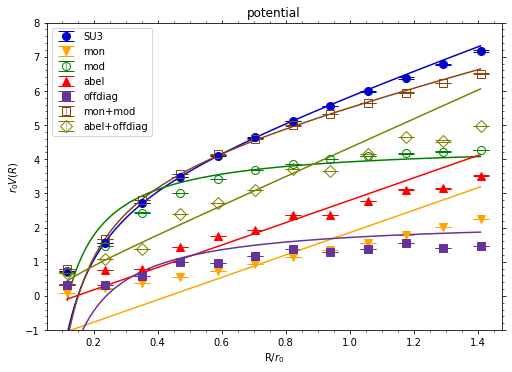

../../images/potential/decomposition/su3/gluodynamics/36^4/beta6.3/potential_decomposition_full_fit_from_original_36^4_beta6p3


In [21]:
make_plot_decomposition('../../result/potential/wilson_loop/adjoint/su3/gluodynamics', '36^4', 6.3, 'beta6.3', 'steps_500/copies=3', 'compensate_1', 12, 11, (-1, 8))

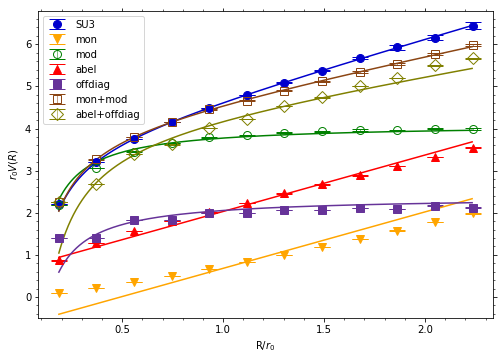

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_fit_from_original_24^4_beta6p0


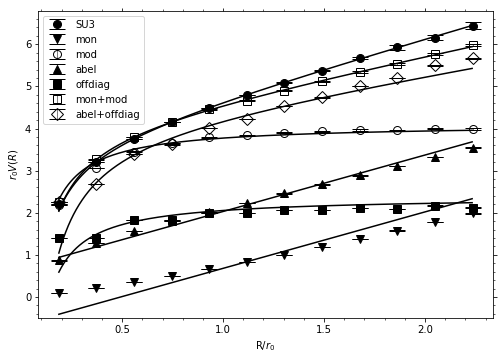

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_fit_from_original_24^4_beta6p0_black


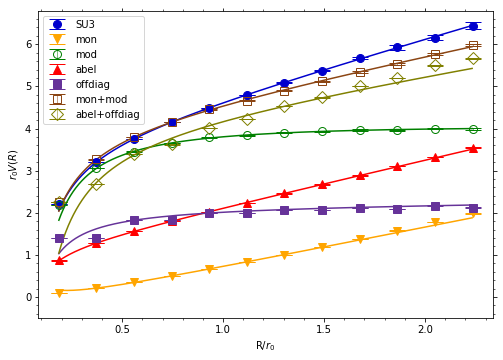

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_fit_separate_24^4_beta6p0


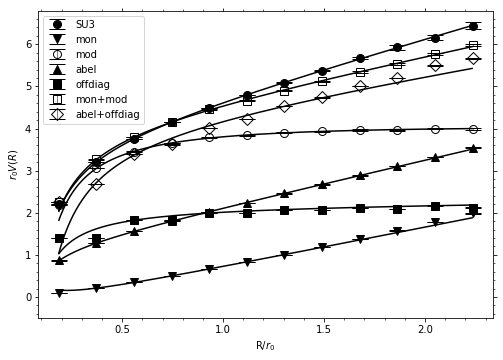

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_fit_separate_24^4_beta6p0_black


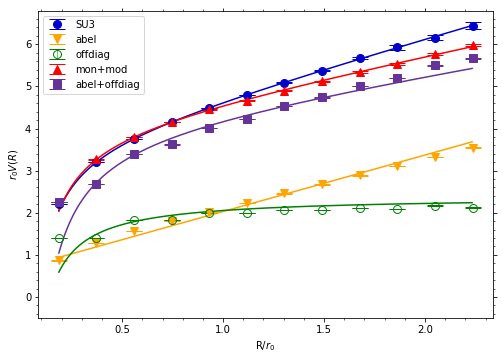

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_mon_mod_removed_fit_from_original_24^4_beta6p0


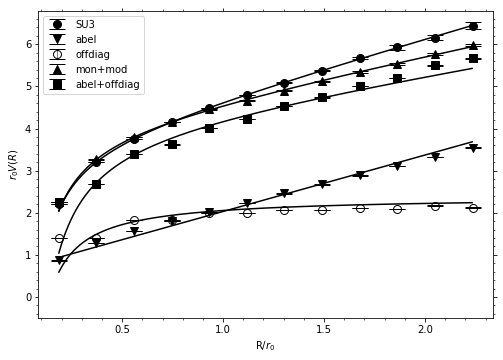

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_mon_mod_removed_fit_from_original_24^4_beta6p0_black


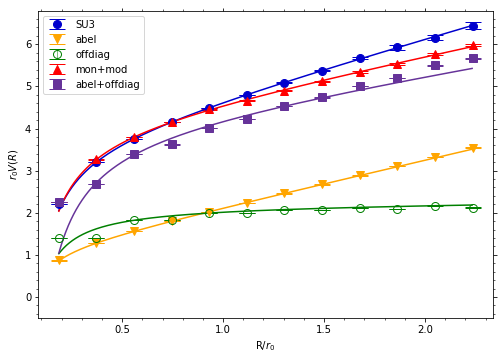

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_mon_mod_removed_fit_separate_24^4_beta6p0


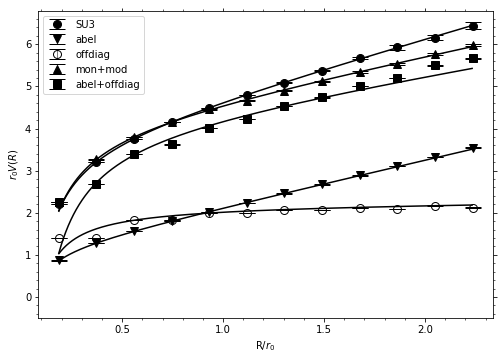

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_mon_mod_removed_fit_separate_24^4_beta6p0_black


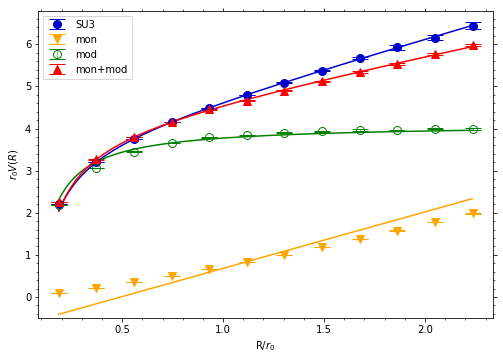

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_mon_mod_fit_from_original_24^4_beta6p0


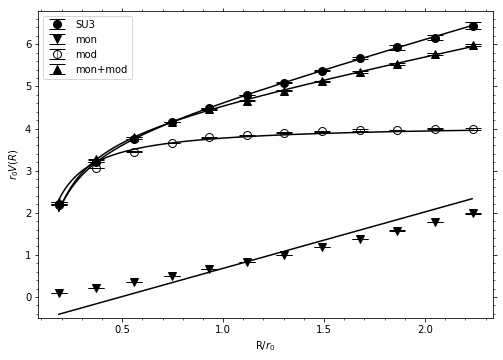

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_mon_mod_fit_from_original_24^4_beta6p0_black


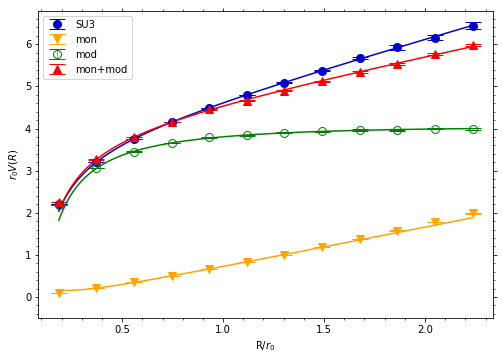

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_mon_mod_fit_separate_24^4_beta6p0


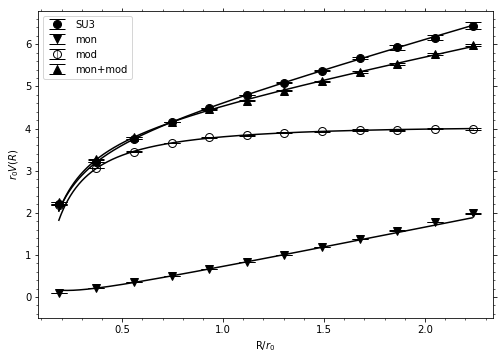

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_mon_mod_fit_separate_24^4_beta6p0_black


In [6]:
make_plot_decomposition('../../result/potential/wilson_loop/fundamental/su3/gluodynamics', '24^4', 6.0, 'beta6.0', 'steps_500/copies=3', 'compensate_1', 12, 11, (-0.5, 6.8))

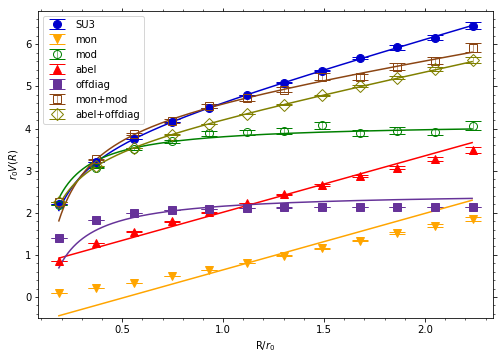

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_fit_from_original_24^4_beta6p0


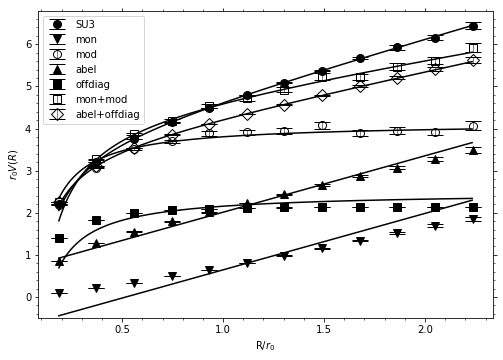

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_fit_from_original_24^4_beta6p0_black


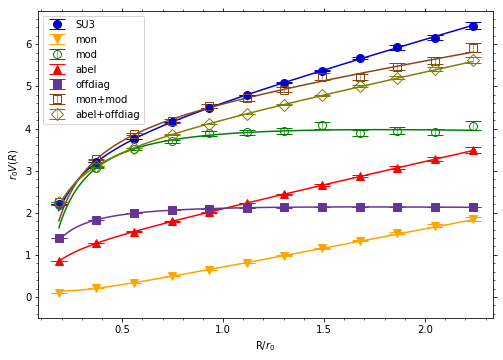

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_fit_separate_24^4_beta6p0


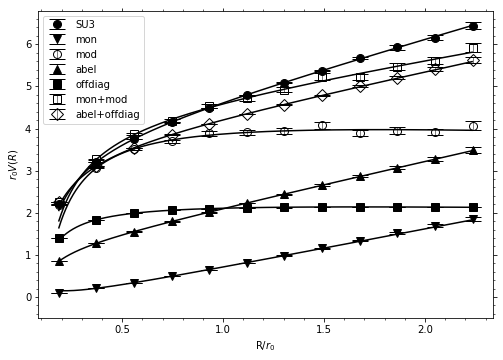

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_fit_separate_24^4_beta6p0_black


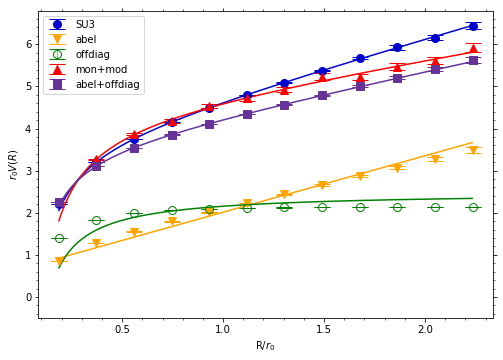

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_mon_mod_removed_fit_from_original_24^4_beta6p0


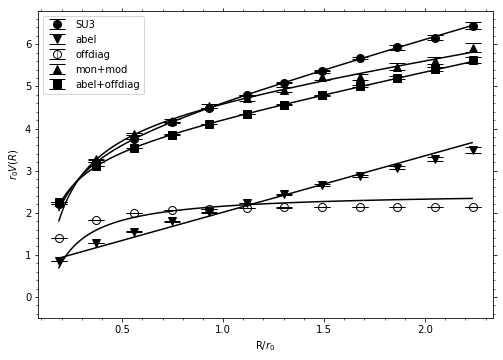

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_mon_mod_removed_fit_from_original_24^4_beta6p0_black


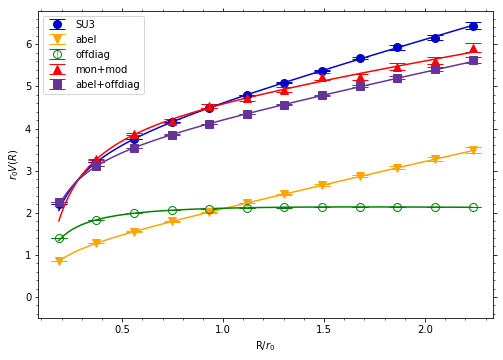

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_mon_mod_removed_fit_separate_24^4_beta6p0


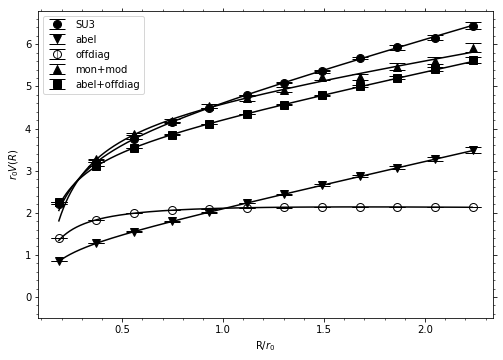

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_mon_mod_removed_fit_separate_24^4_beta6p0_black


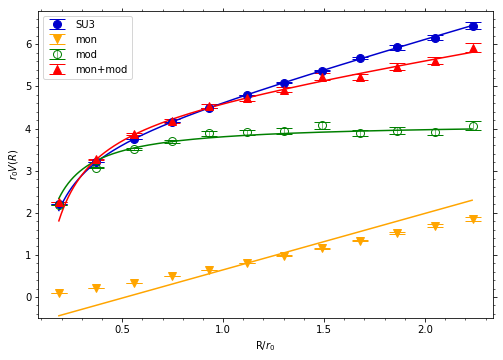

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_mon_mod_fit_from_original_24^4_beta6p0


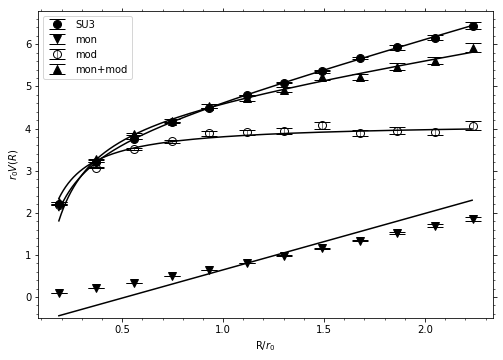

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_mon_mod_fit_from_original_24^4_beta6p0_black


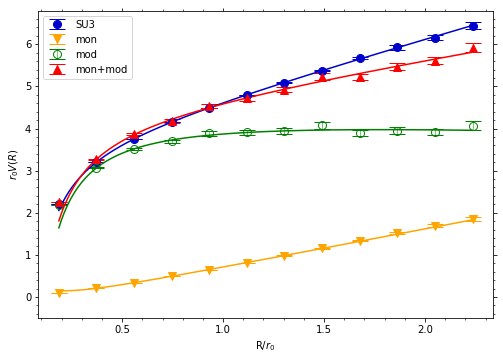

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_mon_mod_fit_separate_24^4_beta6p0


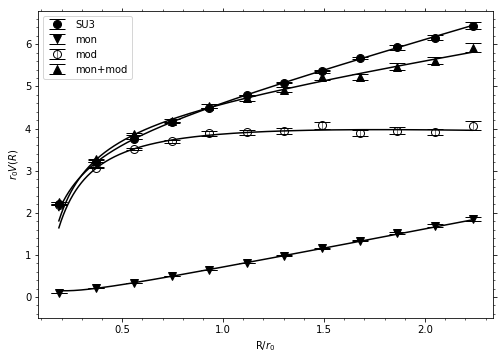

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_mon_mod_fit_separate_24^4_beta6p0_black


In [7]:
make_plot_decomposition('../../result/potential/wilson_loop/fundamental/su3/gluodynamics', '24^4', 6.0, 'beta6.0', 'steps_1000/copies=3', 'compensate_1', 12, 11, (-0.5, 6.8))

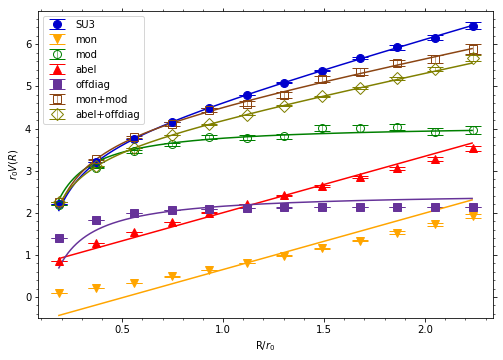

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_fit_from_original_24^4_beta6p0


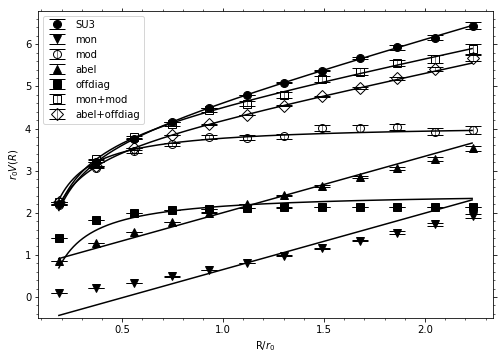

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_fit_from_original_24^4_beta6p0_black


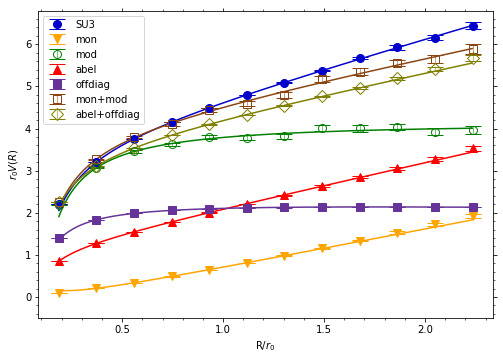

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_fit_separate_24^4_beta6p0


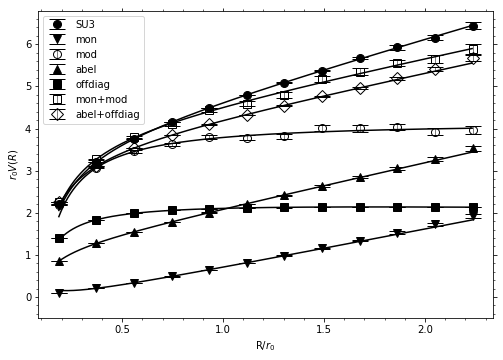

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_fit_separate_24^4_beta6p0_black


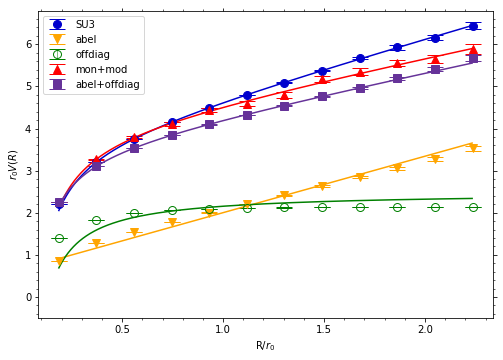

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_mon_mod_removed_fit_from_original_24^4_beta6p0


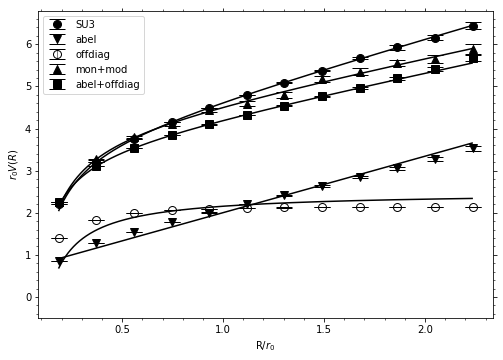

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_mon_mod_removed_fit_from_original_24^4_beta6p0_black


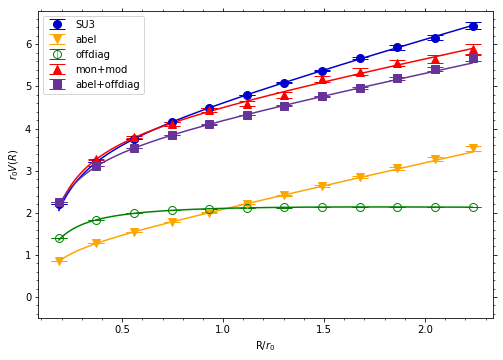

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_mon_mod_removed_fit_separate_24^4_beta6p0


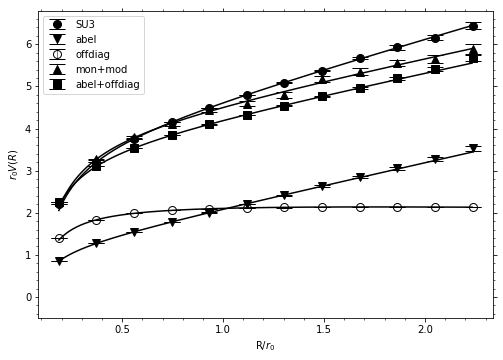

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_mon_mod_removed_fit_separate_24^4_beta6p0_black


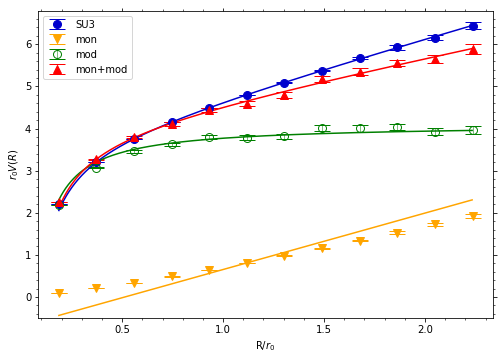

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_mon_mod_fit_from_original_24^4_beta6p0


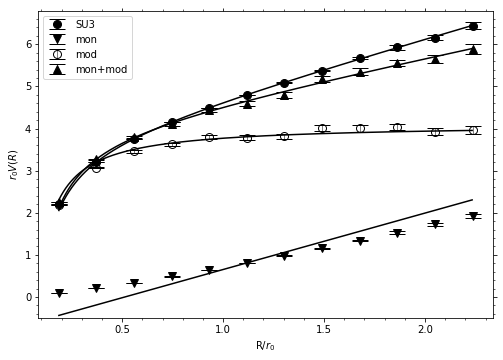

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_mon_mod_fit_from_original_24^4_beta6p0_black


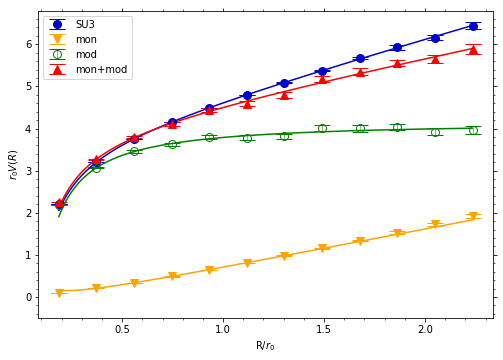

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_mon_mod_fit_separate_24^4_beta6p0


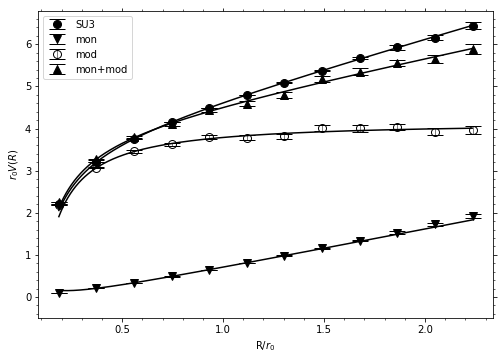

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_mon_mod_fit_separate_24^4_beta6p0_black


In [8]:
make_plot_decomposition('../../result/potential/wilson_loop/fundamental/su3/gluodynamics', '24^4', 6.0, 'beta6.0', 'steps_2000/copies=3', 'compensate_1', 12, 11, (-0.5, 6.8))

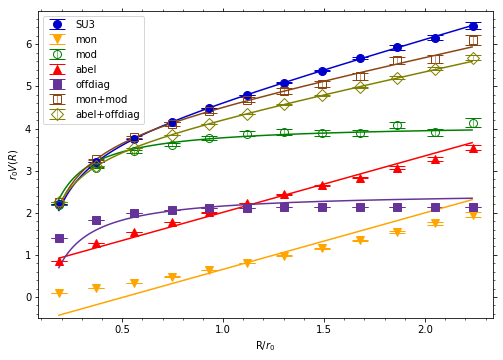

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_fit_from_original_24^4_beta6p0


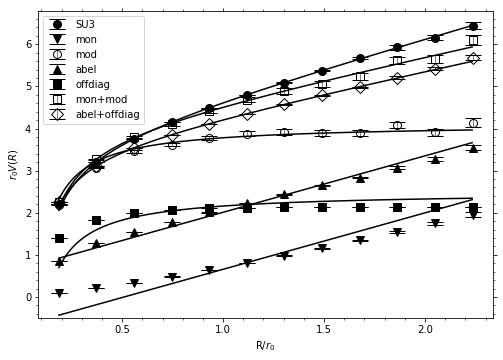

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_fit_from_original_24^4_beta6p0_black


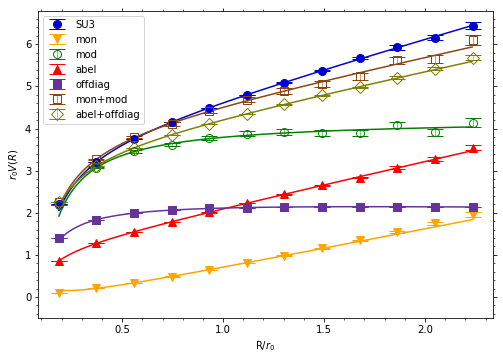

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_fit_separate_24^4_beta6p0


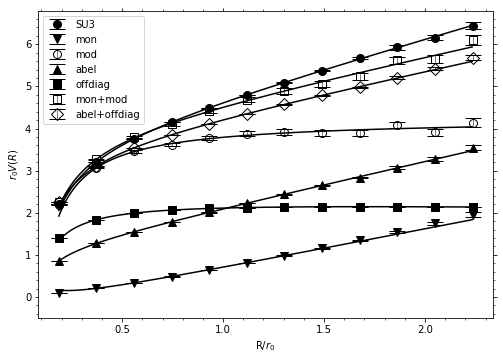

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_fit_separate_24^4_beta6p0_black


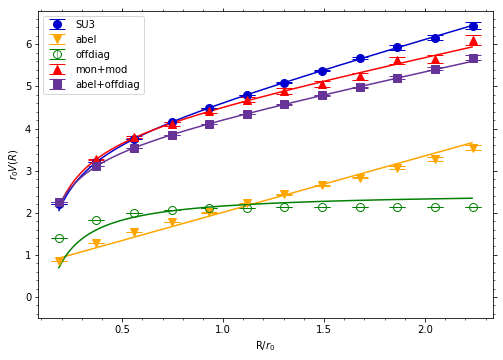

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_mon_mod_removed_fit_from_original_24^4_beta6p0


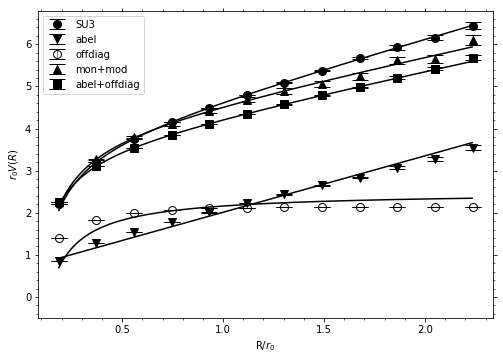

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_mon_mod_removed_fit_from_original_24^4_beta6p0_black


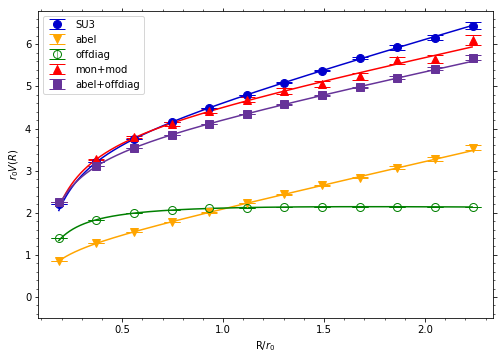

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_mon_mod_removed_fit_separate_24^4_beta6p0


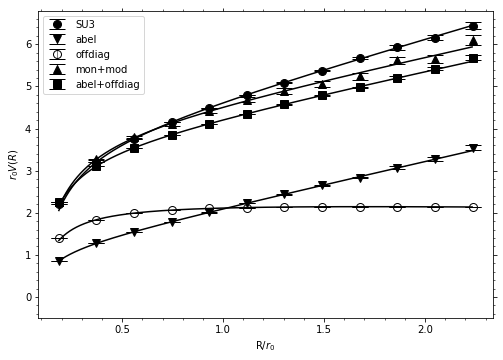

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_mon_mod_removed_fit_separate_24^4_beta6p0_black


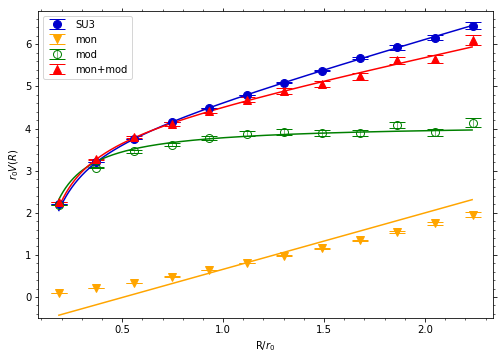

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_mon_mod_fit_from_original_24^4_beta6p0


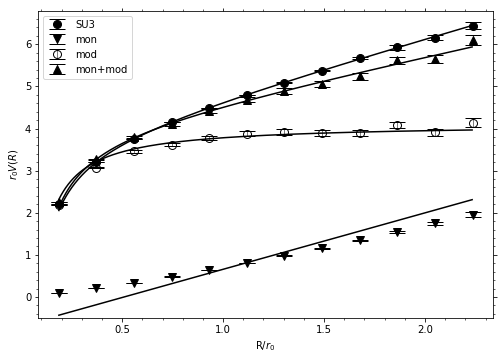

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_mon_mod_fit_from_original_24^4_beta6p0_black


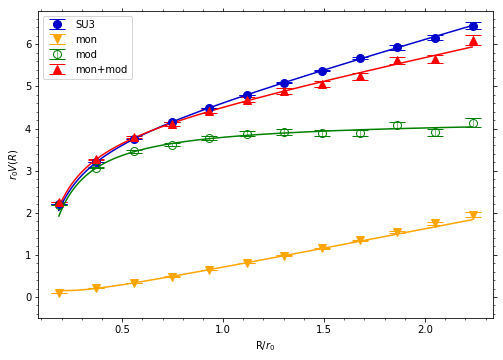

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_mon_mod_fit_separate_24^4_beta6p0


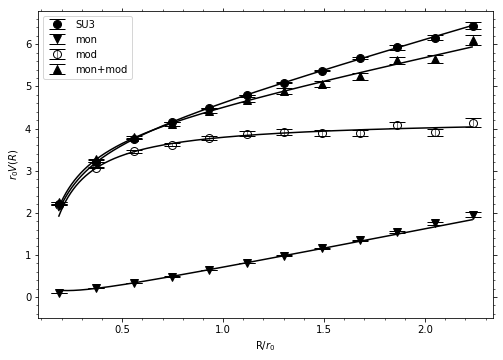

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_mon_mod_fit_separate_24^4_beta6p0_black


In [9]:
make_plot_decomposition('../../result/potential/wilson_loop/fundamental/su3/gluodynamics', '24^4', 6.0, 'beta6.0', 'steps_4000/copies=3', 'compensate_1', 12, 11, (-0.5, 6.8))

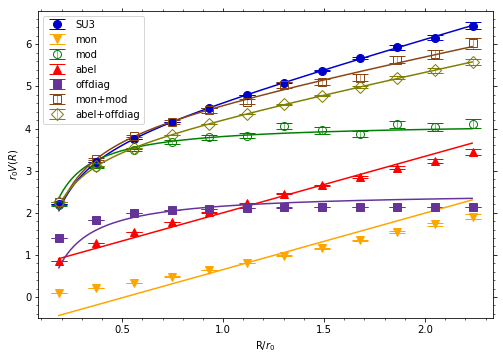

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_fit_from_original_24^4_beta6p0


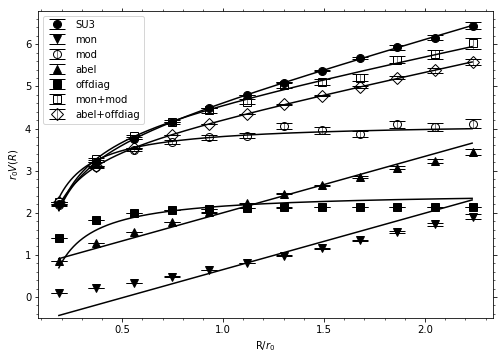

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_fit_from_original_24^4_beta6p0_black


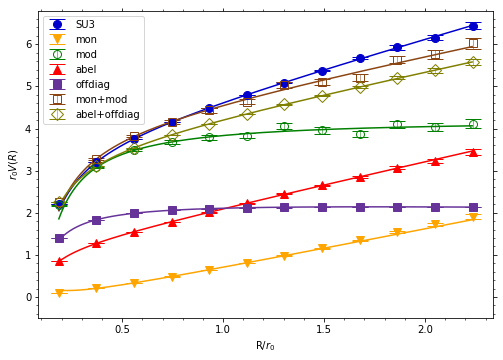

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_fit_separate_24^4_beta6p0


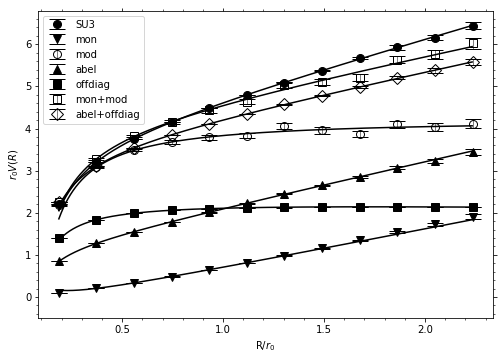

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_fit_separate_24^4_beta6p0_black


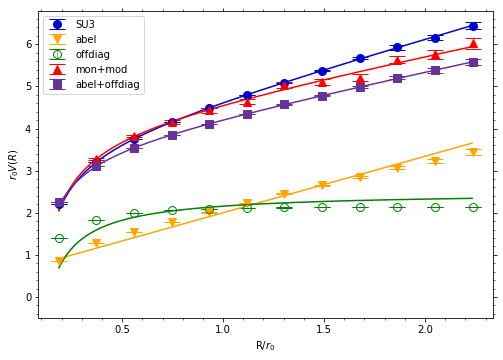

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_mon_mod_removed_fit_from_original_24^4_beta6p0


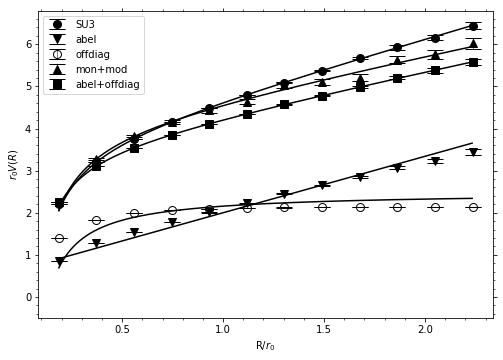

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_mon_mod_removed_fit_from_original_24^4_beta6p0_black


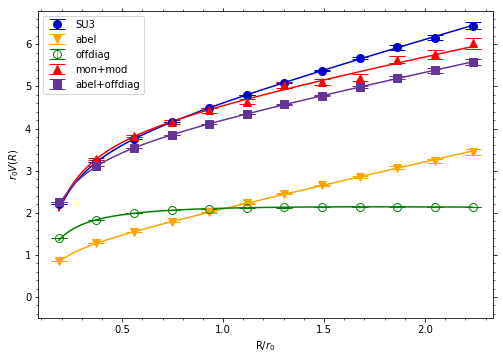

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_mon_mod_removed_fit_separate_24^4_beta6p0


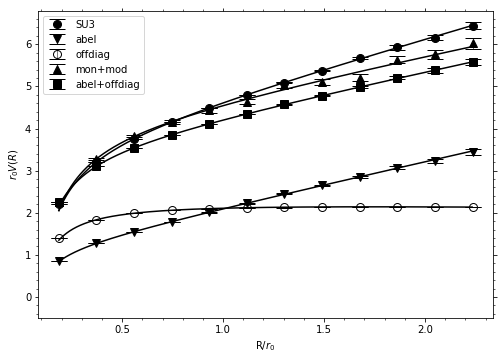

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_full_mon_mod_removed_fit_separate_24^4_beta6p0_black


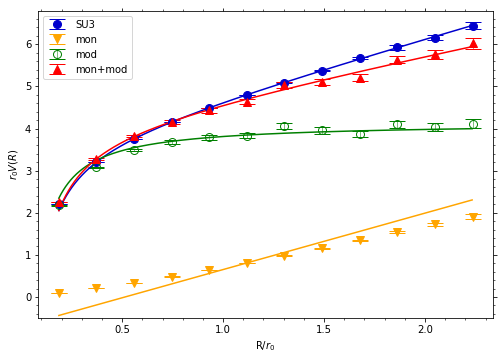

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_mon_mod_fit_from_original_24^4_beta6p0


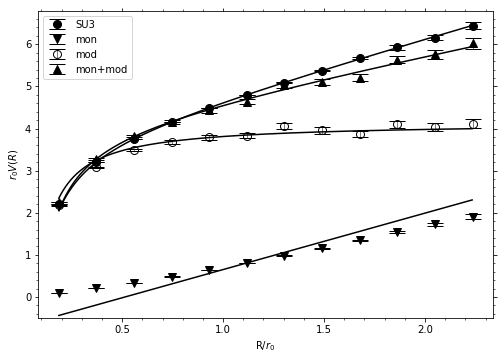

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_mon_mod_fit_from_original_24^4_beta6p0_black


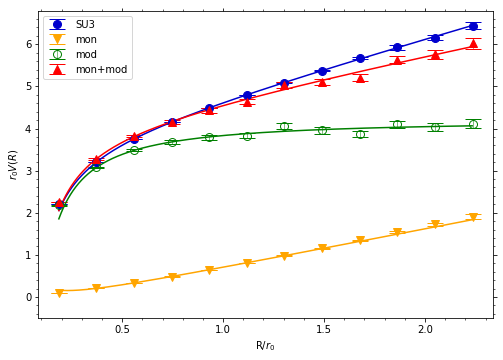

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_mon_mod_fit_separate_24^4_beta6p0


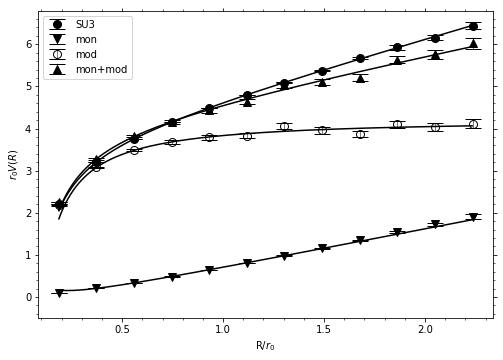

../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/potential_decomposition_mon_mod_fit_separate_24^4_beta6p0_black


In [10]:
make_plot_decomposition('../../result/potential/wilson_loop/fundamental/su3/gluodynamics', '24^4', 6.0, 'beta6.0', 'steps_8000/copies=3', 'compensate_1', 12, 11, (-0.5, 6.8))

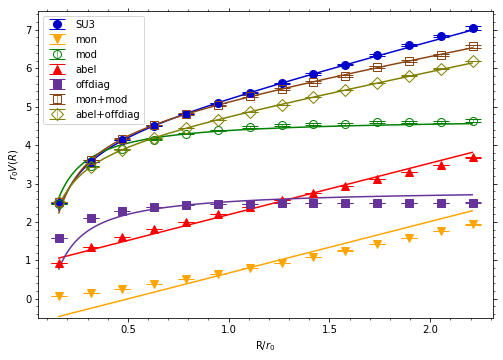

../../images/potential/decomposition/su3/gluodynamics/28^4/beta6.1/potential_decomposition_full_fit_from_original_28^4_beta6p1


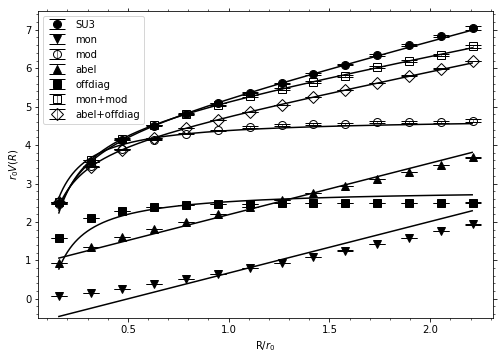

../../images/potential/decomposition/su3/gluodynamics/28^4/beta6.1/potential_decomposition_full_fit_from_original_28^4_beta6p1_black


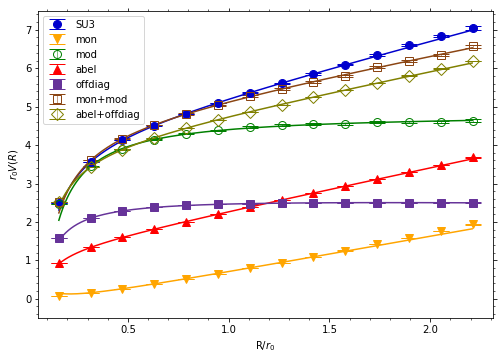

../../images/potential/decomposition/su3/gluodynamics/28^4/beta6.1/potential_decomposition_full_fit_separate_28^4_beta6p1


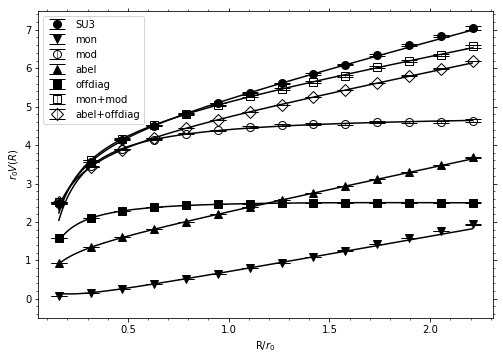

../../images/potential/decomposition/su3/gluodynamics/28^4/beta6.1/potential_decomposition_full_fit_separate_28^4_beta6p1_black


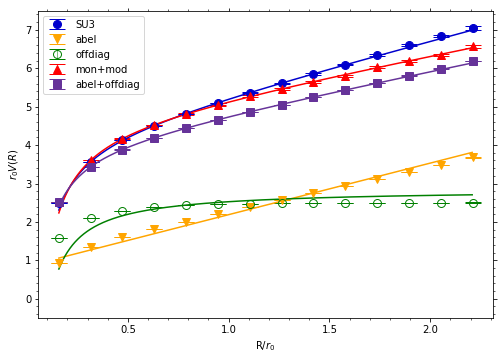

../../images/potential/decomposition/su3/gluodynamics/28^4/beta6.1/potential_decomposition_full_mon_mod_removed_fit_from_original_28^4_beta6p1


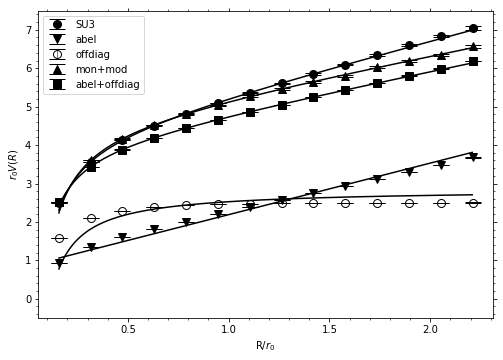

../../images/potential/decomposition/su3/gluodynamics/28^4/beta6.1/potential_decomposition_full_mon_mod_removed_fit_from_original_28^4_beta6p1_black


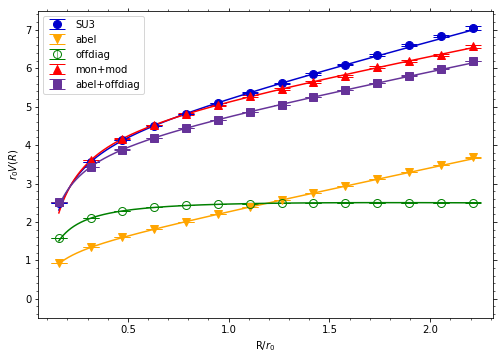

../../images/potential/decomposition/su3/gluodynamics/28^4/beta6.1/potential_decomposition_full_mon_mod_removed_fit_separate_28^4_beta6p1


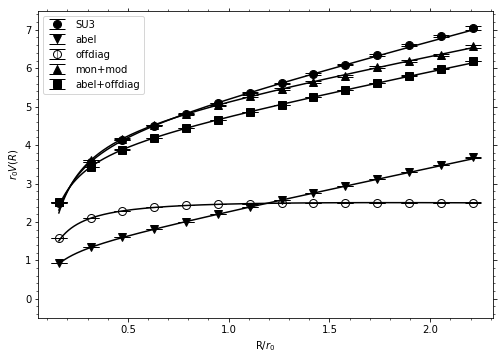

../../images/potential/decomposition/su3/gluodynamics/28^4/beta6.1/potential_decomposition_full_mon_mod_removed_fit_separate_28^4_beta6p1_black


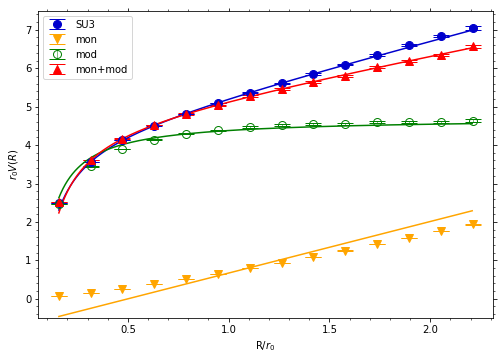

../../images/potential/decomposition/su3/gluodynamics/28^4/beta6.1/potential_decomposition_mon_mod_fit_from_original_28^4_beta6p1


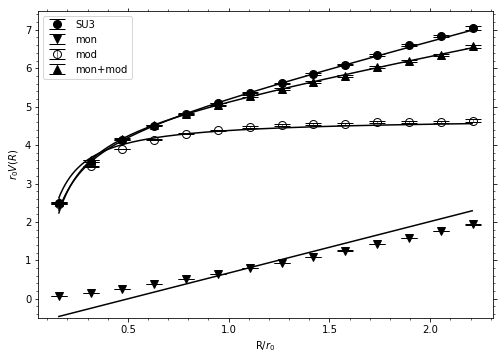

../../images/potential/decomposition/su3/gluodynamics/28^4/beta6.1/potential_decomposition_mon_mod_fit_from_original_28^4_beta6p1_black


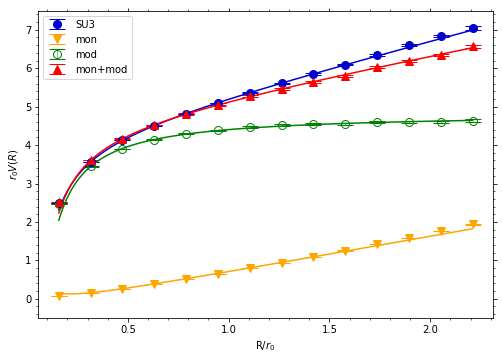

../../images/potential/decomposition/su3/gluodynamics/28^4/beta6.1/potential_decomposition_mon_mod_fit_separate_28^4_beta6p1


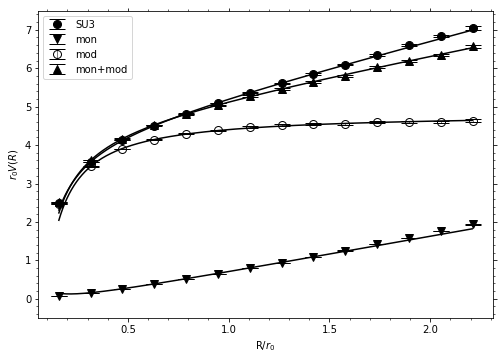

../../images/potential/decomposition/su3/gluodynamics/28^4/beta6.1/potential_decomposition_mon_mod_fit_separate_28^4_beta6p1_black


In [11]:
make_plot_decomposition('../../result/potential/wilson_loop/fundamental/su3/gluodynamics', '28^4', 6.1, 'beta6.1', 'steps_500/copies=3', 'compensate_1', 14, 14, (-0.5, 7.5))

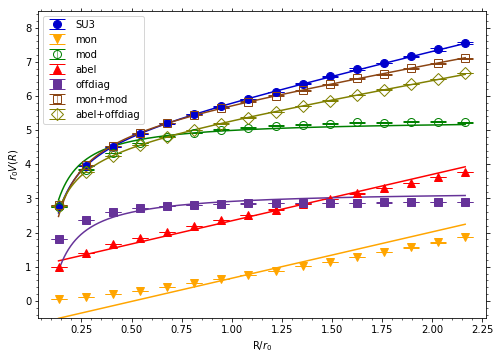

../../images/potential/decomposition/su3/gluodynamics/32^4/beta6.2/potential_decomposition_full_fit_from_original_32^4_beta6p2


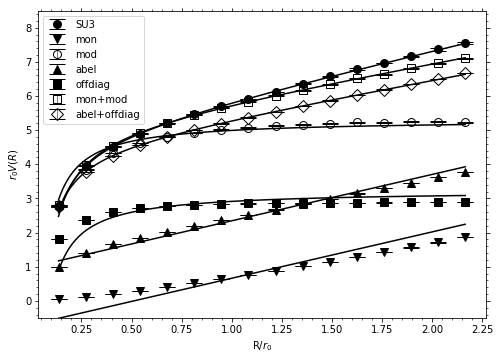

../../images/potential/decomposition/su3/gluodynamics/32^4/beta6.2/potential_decomposition_full_fit_from_original_32^4_beta6p2_black


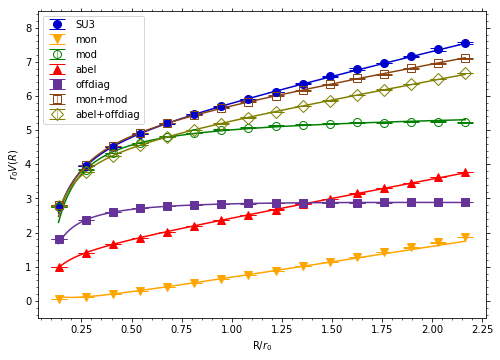

../../images/potential/decomposition/su3/gluodynamics/32^4/beta6.2/potential_decomposition_full_fit_separate_32^4_beta6p2


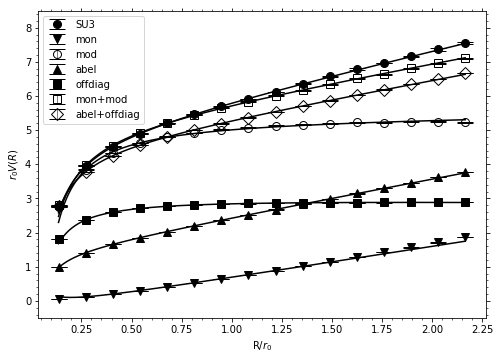

../../images/potential/decomposition/su3/gluodynamics/32^4/beta6.2/potential_decomposition_full_fit_separate_32^4_beta6p2_black


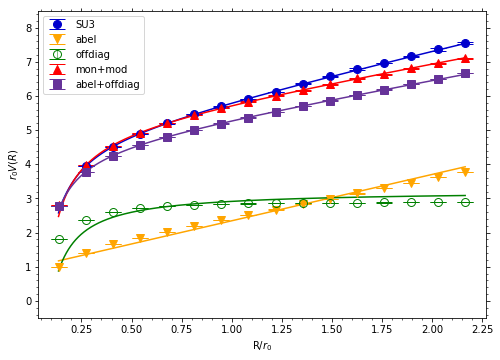

../../images/potential/decomposition/su3/gluodynamics/32^4/beta6.2/potential_decomposition_full_mon_mod_removed_fit_from_original_32^4_beta6p2


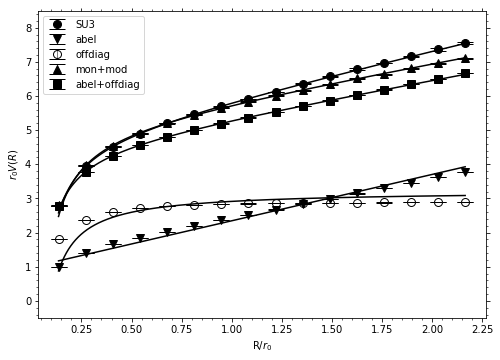

../../images/potential/decomposition/su3/gluodynamics/32^4/beta6.2/potential_decomposition_full_mon_mod_removed_fit_from_original_32^4_beta6p2_black


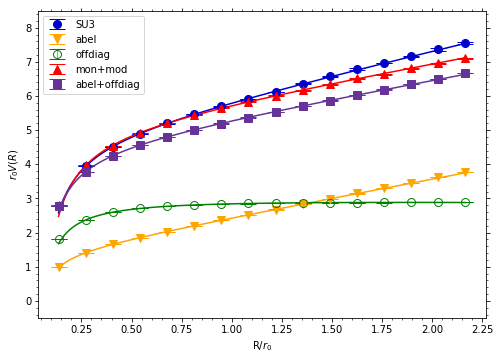

../../images/potential/decomposition/su3/gluodynamics/32^4/beta6.2/potential_decomposition_full_mon_mod_removed_fit_separate_32^4_beta6p2


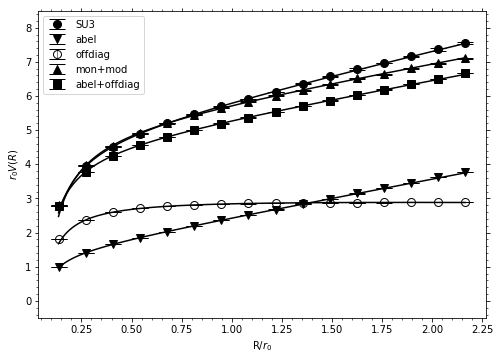

../../images/potential/decomposition/su3/gluodynamics/32^4/beta6.2/potential_decomposition_full_mon_mod_removed_fit_separate_32^4_beta6p2_black


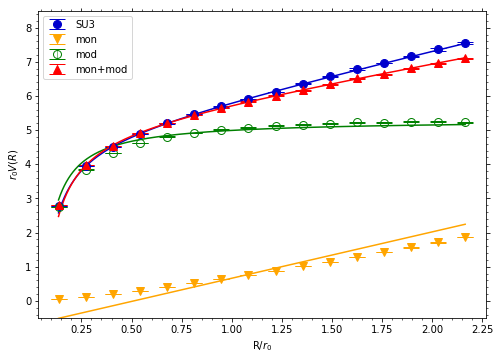

../../images/potential/decomposition/su3/gluodynamics/32^4/beta6.2/potential_decomposition_mon_mod_fit_from_original_32^4_beta6p2


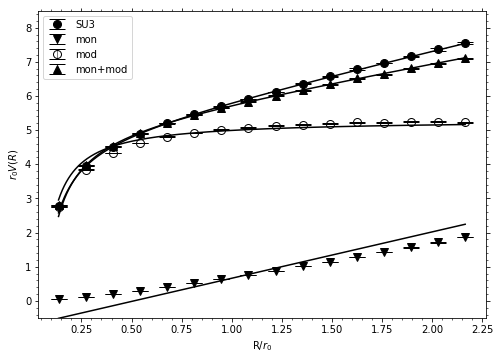

../../images/potential/decomposition/su3/gluodynamics/32^4/beta6.2/potential_decomposition_mon_mod_fit_from_original_32^4_beta6p2_black


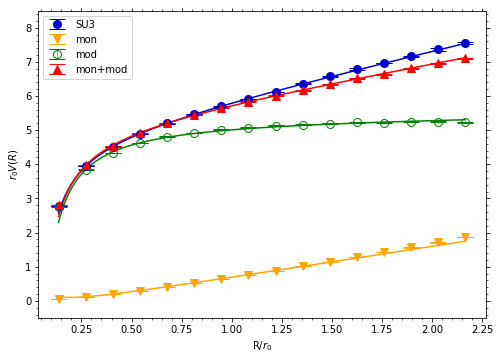

../../images/potential/decomposition/su3/gluodynamics/32^4/beta6.2/potential_decomposition_mon_mod_fit_separate_32^4_beta6p2


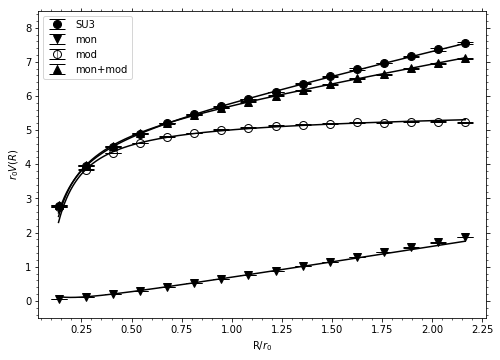

../../images/potential/decomposition/su3/gluodynamics/32^4/beta6.2/potential_decomposition_mon_mod_fit_separate_32^4_beta6p2_black


In [13]:
make_plot_decomposition('../../result/potential/wilson_loop/fundamental/su3/gluodynamics', '32^4', 6.2, 'beta6.2', 'steps_500/copies=3', 'compensate_1', 16, 16, (-0.5, 8.5))

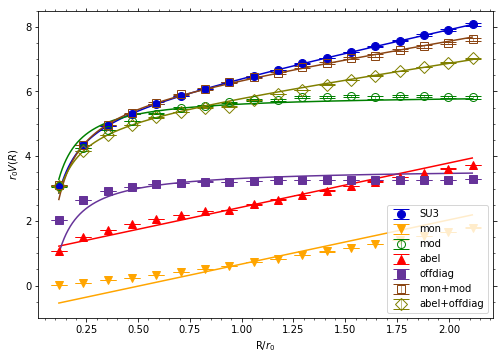

../../images/potential/decomposition/su3/gluodynamics/36^4/beta6.3/potential_decomposition_full_fit_from_original_36^4_beta6p3


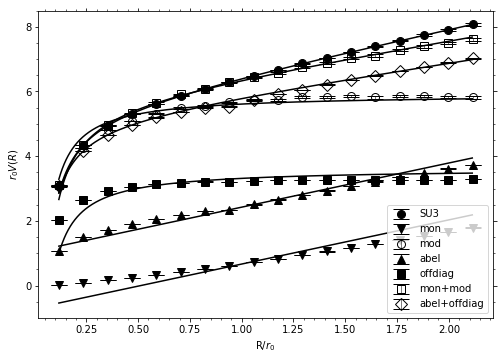

../../images/potential/decomposition/su3/gluodynamics/36^4/beta6.3/potential_decomposition_full_fit_from_original_36^4_beta6p3_black


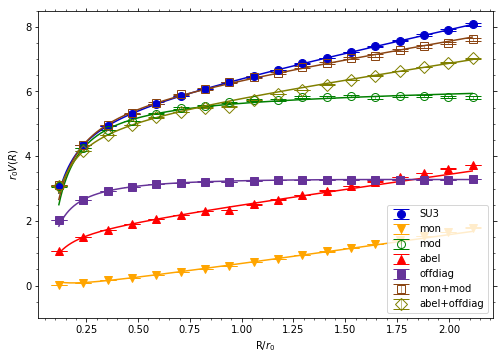

../../images/potential/decomposition/su3/gluodynamics/36^4/beta6.3/potential_decomposition_full_fit_separate_36^4_beta6p3


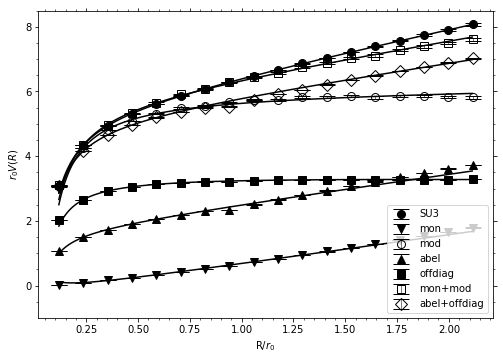

../../images/potential/decomposition/su3/gluodynamics/36^4/beta6.3/potential_decomposition_full_fit_separate_36^4_beta6p3_black


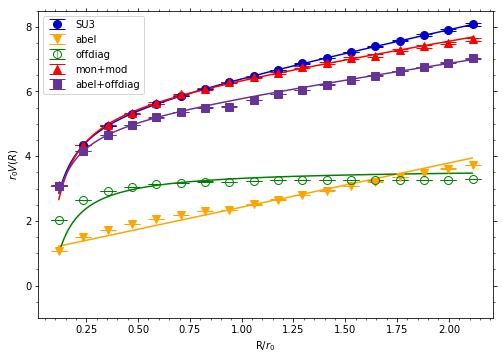

../../images/potential/decomposition/su3/gluodynamics/36^4/beta6.3/potential_decomposition_full_mon_mod_removed_fit_from_original_36^4_beta6p3


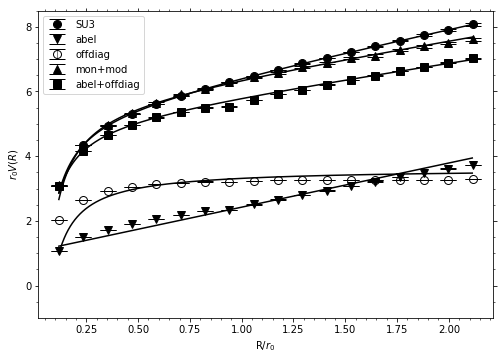

../../images/potential/decomposition/su3/gluodynamics/36^4/beta6.3/potential_decomposition_full_mon_mod_removed_fit_from_original_36^4_beta6p3_black


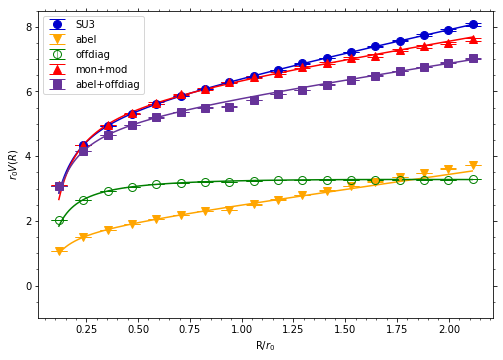

../../images/potential/decomposition/su3/gluodynamics/36^4/beta6.3/potential_decomposition_full_mon_mod_removed_fit_separate_36^4_beta6p3


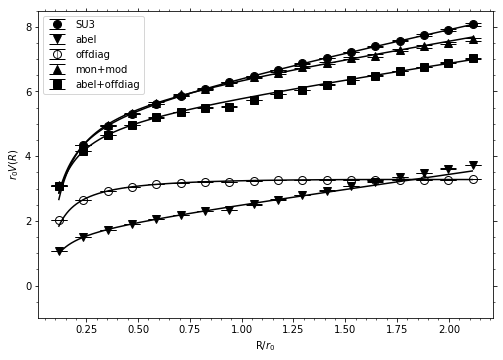

../../images/potential/decomposition/su3/gluodynamics/36^4/beta6.3/potential_decomposition_full_mon_mod_removed_fit_separate_36^4_beta6p3_black


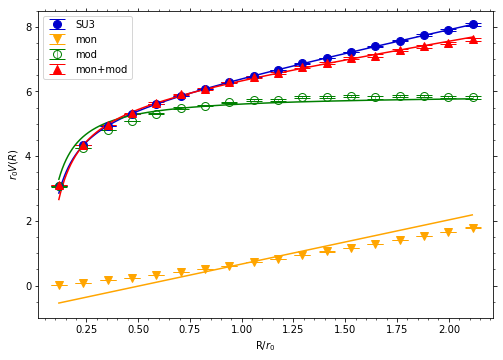

../../images/potential/decomposition/su3/gluodynamics/36^4/beta6.3/potential_decomposition_mon_mod_fit_from_original_36^4_beta6p3


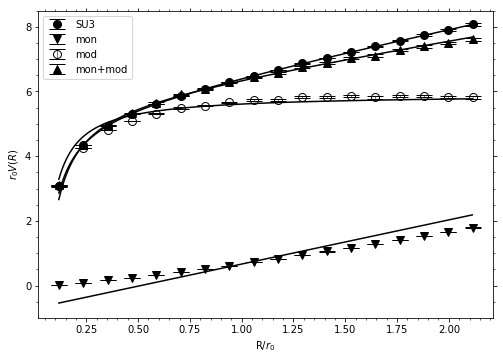

../../images/potential/decomposition/su3/gluodynamics/36^4/beta6.3/potential_decomposition_mon_mod_fit_from_original_36^4_beta6p3_black


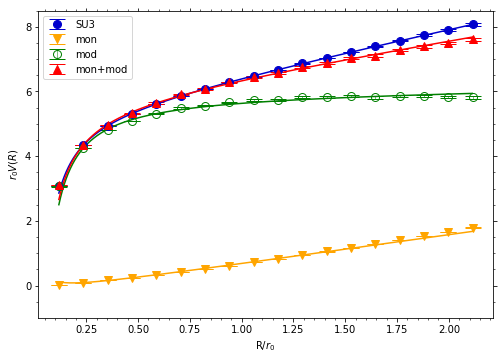

../../images/potential/decomposition/su3/gluodynamics/36^4/beta6.3/potential_decomposition_mon_mod_fit_separate_36^4_beta6p3


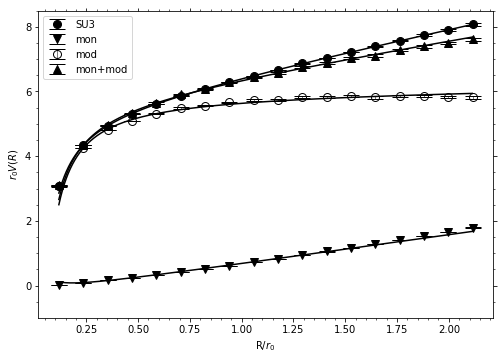

../../images/potential/decomposition/su3/gluodynamics/36^4/beta6.3/potential_decomposition_mon_mod_fit_separate_36^4_beta6p3_black


In [14]:
make_plot_decomposition('../../result/potential/wilson_loop/fundamental/su3/gluodynamics', '36^4', 6.3, 'beta6.3', 'steps_500/copies=3', 'compensate_1', 18, 16, (-1, 8.5))

In [ ]:
make_plot_decomposition('../../result/potential/wilson_loop/fundamental/su3/gluodynamics', '36^4', 6.3, 'beta6.3', 'steps_1000/copies=3', 'compensate_1', 18, 17, (-1, 8.5))

In [ ]:
make_plot_decomposition('../../result/potential/wilson_loop/fundamental/su3/gluodynamics', '36^4', 6.3, 'beta6.3', 'steps_2000/copies=3', 'compensate_1', 18, 17, (-1, 8.5))

In [ ]:
make_plot_decomposition('../../result/potential/wilson_loop/fundamental/su3/gluodynamics', '36^4', 6.3, 'beta6.3', 'steps_4000/copies=3', 'compensate_1', 18, 17, (-1, 8.5))

In [ ]:
fit_coefs = {'SU(3)': (3.611, -0.337, 1.343),
                'mon+mod': (3.978, -0.390, 0.939)}
path = '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/vitaly'
image_path = '../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/vitaly'
image_name = 'potential_decomposition_abel_offdiag_mon+mod_24^4_beta6p0'
terms = ['SU(3)', 'mon', 'mod']
to_fit = ['abel', 'offdiag', 'abel+offdiag']
to_remove = ['mon', 'mod']
y_lims = (-0.5, 6.8)
beta = 6.0
path1 = '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0'
paths = ({'name' : 'abel', 'path' : f'{path1}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_abelian.csv', 'T' : 8}, 
        {'name' : 'offdiag', 'path' : f'{path1}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/compensate_1/potential_offdiagonal.csv', 'T' : 6})
potential_decomposition_general(paths, path, image_path, image_name, fit_coefs, to_fit, to_remove, terms, y_lims, beta, 12)

In [ ]:
fit_coefs = {'SU(3)': (3.611, -0.337, 1.343)}
path = '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/vitaly'
image_path = '../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/vitaly'
image_name = 'potential_decomposition_abel_offdiag_24^4_beta6p0'
terms = ['SU(3)', 'mon', 'mod']
to_fit = ['abel', 'offdiag', 'abel+offdiag']
to_remove = ['mon', 'mod', 'mon+mod']
y_lims = (-0.5, 6.8)
beta = 6.0
path1 = '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0'
paths = ({'name' : 'abel', 'path' : f'{path1}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_abelian.csv', 'T' : 8}, 
        {'name' : 'offdiag', 'path' : f'{path1}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/compensate_1/potential_offdiagonal.csv', 'T' : 6})
potential_decomposition_general(paths, path, image_path, image_name, fit_coefs, to_fit, to_remove, terms, y_lims, beta, 12)

In [ ]:
fit_coefs = {'SU(3)': (3.611, -0.337, 1.343),
        'mon': (-0.365, 0.0887, 0.993),
        'mod': (4.222, -0.424, 0),
        'mon+mod': (3.978, -0.390, 0.939)}
path = '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/vitaly'
image_path = '../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/vitaly'
image_name = 'potential_decomposition_full_24^4_beta6p0'
terms = ['SU(3)', 'mon', 'mod']
to_fit = ['abel', 'offdiag', 'abel+offdiag']
to_remove = []
y_lims = (-0.5, 6.8)
beta = 6.0
path1 = '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0'
paths = ({'name' : 'abel', 'path' : f'{path1}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_abelian.csv', 'T' : 8}, 
        {'name' : 'offdiag', 'path' : f'{path1}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/compensate_1/potential_offdiagonal.csv', 'T' : 6})
potential_decomposition_general(paths, path, image_path, image_name, fit_coefs, to_fit, to_remove, terms, y_lims, beta, 12)

In [ ]:
coefs = {'SU(3)': (3.611, -0.337, 1.343),
        'mon': (-0.365, 0.0887, 0.993),
        'mod': (4.222, -0.424, 0),
        'mon+mod': (3.978, -0.390, 0.939)}
path = '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/vitaly'
image_path = '../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/vitaly'
image_name = 'potential_decomposition_mon_mod_abel+offdiag_24^4_beta6p0'
terms = ['SU(3)', 'mon', 'mod']
y_lims = (-0.5, 6.8)
beta = 6.0
path1 = '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0'
paths = ({'name' : 'abel', 'path' : f'{path1}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_abelian.csv', 'T' : 8}, 
        {'name' : 'offdiag', 'path' : f'{path1}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/compensate_1/potential_offdiagonal.csv', 'T' : 6})
potential_decomposition_vitaly1(paths, path, image_path, image_name, coefs, terms, y_lims, beta, 12)

In [ ]:
coefs = {'SU(3)': (3.611, -0.337, 1.343),
        'mon': (-0.365, 0.0887, 0.993),
        'mod': (4.222, -0.424, 0),
        'mon+mod': (3.978, -0.390, 0.939)}
path = '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0/vitaly'
image_path = '../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0/vitaly'
image_name = 'potential_decomposition_mon_mod_24^4_beta6p0'
terms = ['SU(3)', 'mon', 'mod']
y_lims = (-0.5, 6.8)
beta = 6.0
potential_decomposition_vitaly(path, image_path, image_name, coefs, terms, y_lims, beta)

In [ ]:
path = '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0'
paths = ({'name' : 'SU3', 'path' : f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv'}, 
        {'name' : 'mon', 'path' : f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/compensate_1/potential_monopole.csv', 'T' : 12}, 
        {'name' : 'mod', 'path' : f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/compensate_1/potential_monopoless.csv', 'T' : 8})
potential_decomposition(paths, f'../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0', 'potential_decomposition_fit_original_24^4_beta6p0', 
                        1, 6.0, 12, (-0.5, 6.8), 'SU3', 'mod', 'mon', 'original')

In [ ]:
path = '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0'
paths = ({'name' : 'SU3', 'path' : f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv', 'T' : 5}, 
        {'name' : 'mon', 'path' : f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/compensate_1/potential_monopole.csv', 'T' : 12}, 
        {'name' : 'mod', 'path' : f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/compensate_1/potential_monopoless.csv', 'T' : 8})
potential_decomposition(paths, f'../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0', 'potential_decomposition_fit_separate_24^4_beta6p0', 
                        1, 6.0, 12, (-0.5, 6.8), 'SU3', 'mod', 'mon', 'separate')

In [ ]:
path = '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0'
paths = ({'name' : 'SU3', 'path' : f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv', 'T' : 5}, 
        {'name' : 'abel', 'path' : f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_abelian.csv', 'T' : 6}, 
        {'name' : 'offdiag', 'path' : f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/compensate_1/potential_offdiagonal.csv', 'T' : 6})

potential_decomposition(paths, f'../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0', 'potential_decomposition1_fit_original_24^4_beta6p0', 
                        1, 6.0, 12, (-0.5, 6.8), 'SU3', 'offdiag', 'abel', 'original')

In [ ]:
path = '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/24^4/beta6.0'
paths = ({'name' : 'SU3', 'path' : f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv', 'T' : 5}, 
        {'name' : 'abel', 'path' : f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_abelian.csv', 'T' : 6}, 
        {'name' : 'offdiag', 'path' : f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/compensate_1/potential_offdiagonal.csv', 'T' : 6})
potential_decomposition(paths, f'../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0', 'potential_decomposition1_fit_separate_24^4_beta6p0', 
                        1, 6.0, 12, (-0.5, 6.8), 'SU3', 'offdiag', 'abel', 'separate')

In [ ]:
path = '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/36^4/beta6.3'
paths = ({'name' : 'SU3', 'path' : f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv', 'T' : 5}, 
        {'name' : 'mon', 'path' : f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/compensate_1/potential_monopole.csv', 'T' : 12}, 
        {'name' : 'mod', 'path' : f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/compensate_1/potential_monopoless.csv', 'T' : 8})
potential_decomposition(paths, f'../../images/potential/decomposition/su3/gluodynamics/36^4/beta6.3', 'potential_decomposition_fit_separate_36^4_beta6p3', 
                        1, 6.0, 12, (-0.5, 6.8), 'SU3', 'mod', 'mon', 'separate')

In [ ]:
path = '../../result/potential/wilson_loop/fundamental/su3/gluodynamics/36^4/beta6.3'
paths = ({'name' : 'SU3', 'path' : f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv', 'T' : 5}, 
        {'name' : 'abel', 'path' : f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_abelian.csv', 'T' : 6}, 
        {'name' : 'offdiag', 'path' : f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/compensate_1/potential_offdiagonal.csv', 'T' : 6})
potential_decomposition(paths, f'../../images/potential/decomposition/su3/gluodynamics/36^4/beta6.3', 'potential_decomposition1_fit_separate_36^4_beta6p3', 
                        1, 6.0, 12, (-0.5, 6.8), 'SU3', 'offdiag', 'abel', 'separate')

In [ ]:
path = '../../result/potential/wilson_loop/potential/su2/su2_suzuki/24^4/beta2.5'
paths = ({'name' : 'SU2', 'path' : f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv', 'T' : 5}, 
        {'name' : 'mon', 'path' : f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/T_step=0.0001/potential_monopole.csv', 'T' : 12}, 
        {'name' : 'mod', 'path' : f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/T_step=0.0001/potential_monopoless.csv', 'T' : 8})
potential_decomposition(paths, f'../../images/potential/decomposition/su2/su2_suzuki/24^4/beta2.5', 'potential_decomposition_24^4_beta2p5', 
                        1, 6.0, 12, (-0.5, 6.8), 'SU3', 'mod', 'mon', 'separate')

In [ ]:
path = '../../result/potential/wilson_loop/potential/su2/su2_suzuki/24^4/beta2.5'
paths = ({'name' : 'SU2', 'path' : f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv', 'T' : 5}, 
        {'name' : 'abel', 'path' : f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/T_step=0.0001/potential_abelian.csv', 'T' : 6}, 
        {'name' : 'offdiag', 'path' : f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/T_step=0.0001/potential_offdiagonal.csv', 'T' : 6})
potential_decomposition(paths, f'../../images/potential/decomposition/su2/su2_suzuki/24^4/beta2.5', 'potential_decomposition1_24^4_beta2p5', 
                        1, 6.0, 12, (-0.5, 6.8), 'SU3', 'mod', 'mon', 'separate')

In [ ]:
path = '../../result/potential/wilson_loop/potential/su2/su2_suzuki/24^4/beta2.5'
paths = ({'name' : 'SU2', 'path' : f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv', 'T' : 5}, 
        {'name' : 'mon', 'path' : f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/T_step=0.0001/potential_monopole.csv', 'T' : 12}, 
        {'name' : 'mod', 'path' : f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/T_step=0.0001/potential_monopoless.csv', 'T' : 8})
potential_decomposition(paths, f'../../images/potential/decomposition/su2/su2_suzuki/24^4/beta5.5', 'potential_decomposition_24^4_beta2p5', 
                        1, 6.0, 12, (-0.5, 6.8), 'SU3', 'mod', 'mon', 'separate')

In [ ]:
path = '../../result/potential/on-axis/su3/gluodynamics/24^4/beta6.0'
paths = ({'name' : 'SU3', 'path' : f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv', 'T' : 5}, 
        {'name' : 'mon', 'path' : f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/compensate_1/potential_monopole.csv', 'T' : 12}, 
        {'name' : 'mod', 'path' : f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/compensate_1/potential_monopoless.csv', 'T' : 8})
potential_decomposition(paths, f'../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0', 'potential_decomposition_24^4_beta6p0', 1, 6.0, 12)

In [ ]:
path = '../../result/smearing/potential/su2/su2_suzuki/24^4/beta2.4'
paths = {'su2': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv', 4, 100), 
        'mon': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/T_step=0.0001/T_final=0.0001/OR_steps=6/potential_monopole.csv', 6, 80), 
        'monless': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/T_step=0.0001/T_final=0.0001/OR_steps=6/potential_monopoless.csv', 6, 80)}
potential_decomposition(paths, f'../images/potential/decomposition/qc2dstag', 'potential_qc2dstag_mu00', 1, 12)

In [ ]:
path = '../../result/smearing/potential/su2/su2_suzuki/48^4/beta2.7'
paths = {'su2': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv', 6, 400), 
        'mon': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/T_step=0.0005/T_final=0.5/OR_steps=4/potential_monopole.csv', 16, 400), 
        'monless': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/T_step=0.0005/T_final=0.5/OR_steps=4/potential_monopoless.csv', 6, 400)}
potential_decomposition(paths, f'../images/potential/decomposition/su2_suzuki', 'potential_su2_suzuki_beta2p7', 1, 24)

In [ ]:
path = '../../result/smearing/potential/su2/su2_suzuki/48^4/beta2.8'
paths = {'su2': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv', 6, 400), 
        'mon': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/T_step=0.001/T_final=0.5/OR_steps=4/potential_monopole.csv', 16, 300), 
        'monless': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/T_step=0.001/T_final=0.5/OR_steps=4/potential_monopoless.csv', 6, 300)}
potential_decomposition(paths, f'../../images/potential/decomposition/su2_suzuki', 'potential_su2_suzuki_beta2p8_0p001', 1, 24)

In [ ]:
path = '../../result/smearing/potential/su2/su2_suzuki/48^4/beta2.8'
paths = {'su2': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv', 6, 400), 
        'mon': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/T_step=0.0005/T_final=0.0005/OR_steps=4/potential_monopole.csv', 16, 30), 
        'monless': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/T_step=0.0005/T_final=0.0005/OR_steps=4/potential_monopoless.csv', 6, 300)}
potential_decomposition(paths, f'../../images/potential/decomposition/su2_suzuki', 'potential_su2_suzuki_beta2p8_0p0005', 1, 24)

In [ ]:
path = '../../result/smearing/potential/su2/su2_suzuki/48^4/beta2.8'
paths = {'su2': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv', 6, 400), 
        'mon': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/T_step=0.0001/T_final=0.5/OR_steps=4/potential_monopole.csv', 16, 200), 
        'monless': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/T_step=0.0001/T_final=0.5/OR_steps=4/potential_monopoless.csv', 6, 300)}
potential_decomposition(paths, f'../../images/potential/decomposition/su2_suzuki', 'potential_su2_suzuki_beta2p8_0p0001', 1, 24)

In [ ]:
path = '../../result/smearing/potential/su2/su2_suzuki/48^4/beta2.8'
paths = {'su2': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv', 6, 400), 
        'mon': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/T_step=5e-05/T_final=0.5/OR_steps=4/potential_monopole.csv', 6, 400), 
        'monless': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/T_step=5e-05/T_final=0.5/OR_steps=4/potential_monopoless.csv', 8, 400)}
potential_decomposition(paths, f'../../images/potential/decomposition/su2_suzuki', 'potential_su2_suzuki_beta2p8_5e-05', 1, 24)

In [ ]:
path = '../../result/smearing/potential/su2/su2_suzuki/48^4/beta2.8'
paths = {'su2': (f'{path}/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv', 8, 360), 
        'mon': (f'{path}/HYP1_alpha=1_1_0.5_APE_alpha=0.5/T_step=5e-05/T_final=0.5/OR_steps=4/potential_monopole.csv', 23, 400), 
        'monless': (f'{path}/HYP1_alpha=1_1_0.5_APE_alpha=0.5/T_step=5e-05/T_final=0.5/OR_steps=4/potential_monopoless.csv', 16, 400)}
potential_decomposition(paths, f'../../images/potential/decomposition/su2_suzuki', 'potential_su2_suzuki_beta2p8_5e-05', 1, 24)

In [ ]:
path = '../../result/smearing/potential/su3/gluodynamics/16^4/beta6.0'
paths = {'su3': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv', 5, 600), 
        'mon': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/compensate_1/potential_monopole.csv', 5, 600), 
        'monless': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/compensate_1/potential_monopoless.csv', 5, 600)}
potential_decomposition(paths, f'../../images/potential/decomposition/su3/gluodynamics/16^4/beta6.0', 'potential_decomposition_16^4_beta6p0', 1, 8)

In [ ]:
path = '../../result/smearing/potential/su3/gluodynamics/16^4/beta6.0'
paths = {'su3': (f'{path}/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv', 5, 600), 
        'mon': (f'{path}/HYP1_alpha=1_1_0.5_APE_alpha=0.5/compensate_1/potential_monopole.csv', 5, 600), 
        'monless': (f'{path}/HYP1_alpha=1_1_0.5_APE_alpha=0.5/compensate_1/potential_monopoless.csv', 5, 600)}
potential_decomposition(paths, f'../../images/potential/decomposition/su3/gluodynamics/16^4/beta6.0', 'potential_decomposition_16^4_beta6p0', 1, 8)

In [ ]:
path = '../../result/smearing/potential/su3/gluodynamics/16^4/beta6.0'
paths = {'su3': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv', 5, 600), 
        'abel': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential_abelian.csv', 6, 600), 
        'offdiag': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/compensate_1/potential_offdiagonal.csv', 6, 600)}
potential_decomposition(paths, f'../../images/potential/decomposition/su3/gluodynamics/16^4/beta6.0', 'potential_decomposition1_16^4_beta6p0', 1, 8)

In [ ]:
path = '../../result/smearing/potential/su3/gluodynamics/16^4/beta6.0'
paths = {'su3': (f'{path}/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv', 5, 600), 
        'abel': (f'{path}/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_abelian.csv', 6, 600), 
        'offdiag': (f'{path}/HYP1_alpha=1_1_0.5_APE_alpha=0.5/compensate_1/potential_offdiagonal.csv', 6, 600)}
potential_decomposition(paths, f'../../images/potential/decomposition/su3/gluodynamics/16^4/beta6.0', 'potential_decomposition1_16^4_beta6p0', 1, 8)

In [ ]:
path = '../../result/smearing/potential/su3/gluodynamics/16^4/beta6.0'
paths = {'abel': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential_abelian.csv', 6, 600), 
        'mon': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/compensate_1/potential_monopole.csv', 6, 600), 
        'phot': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/compensate_1/potential_photon.csv', 6, 600)}
potential_decomposition(paths, f'../../images/potential/decomposition/su3/gluodynamics/16^4/beta6.0', 'potential_decomposition2_16^4_beta6p0', 1, 8)

In [ ]:
path = '../../result/smearing/potential/su3/gluodynamics/16^4/beta6.0'
paths = {'abel': (f'{path}/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_abelian.csv', 6, 600), 
        'mon': (f'{path}/HYP1_alpha=1_1_0.5_APE_alpha=0.5/compensate_1/potential_monopole.csv', 6, 600), 
        'phot': (f'{path}/HYP1_alpha=1_1_0.5_APE_alpha=0.5/compensate_1/potential_photon.csv', 6, 600)}
potential_decomposition(paths, f'../../images/potential/decomposition/su3/gluodynamics/16^4/beta6.0', 'potential_decomposition2_16^4_beta6p0', 1, 8)

In [ ]:
path = '../../result/potential/on-axis/su3/gluodynamics/24^4/beta6.0'
paths = {'su3': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv', 6), 
        'mon': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/compensate_1/potential_monopole.csv', 12), 
        'monless': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/compensate_1/potential_monopoless.csv', 8)}
potential_decomposition(paths, f'../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0', 'potential_decomposition_24^4_beta6p0', 1, 6.0, 12)

In [ ]:
path = '../../result/potential/on-axis/su3/gluodynamics/24^4/beta6.0'
paths = {'su3': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv', 6), 
        'abel': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_abelian.csv', 6), 
        'offdiag': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/compensate_1/potential_offdiagonal.csv', 6)}

potential_decomposition(paths, f'../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0', 'potential_decomposition1_24^4_beta6p0', 1, 12)

In [ ]:
path = '../../result/potential/on-axis/su3/gluodynamics/24^4/beta6.0'
paths = {'abel': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_abelian.csv', 6), 
        'mon': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/compensate_1/potential_monopole.csv', 6), 
        'phot': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/compensate_1/potential_photon.csv', 6)}
potential_decomposition(paths, f'../../images/potential/decomposition/su3/gluodynamics/24^4/beta6.0', 'potential_decomposition2_24^4_beta6p0', 1, 12)

In [ ]:
path = '../../result/potential/on-axis/su3/gluodynamics/24^4/beta6.0'
paths = {'su3_HYP0': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv', 6), 
         'su3_HYP1': (f'{path}/HYP1_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv', 6)}
potentials_together(paths, 1, 12)

In [ ]:
path = '../../result/potential/wilson_loop/potential/su3/gluodynamics/36^4/beta6.3'
paths = {'su3': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv', 7), 
        'mon': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/compensate_1/potential_monopole.csv', 18), 
        'monless': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/compensate_1/potential_monopoless.csv', 7)}
potential_decomposition(paths, f'../../images/potential/decomposition/su3/gluodynamics/36^4/beta6.3', 'potential_decomposition_36^4_beta6p3', 1, 18)

In [ ]:
path = '../../result/potential/wilson_loop/potential/su3/gluodynamics/36^4/beta6.3'
paths = {'su3': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/potential_original.csv', 7), 
        'abel': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_abelian.csv', 12), 
        'offdiag': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/compensate_1/potential_offdiagonal.csv', 12)}
potential_decomposition(paths, f'../../images/potential/decomposition/su3/gluodynamics/36^4/beta6.3', 'potential_decomposition1_36^4_beta6p3', 1, 18)

In [ ]:
path = '../../result/potential/wilson_loop/potential/su3/gluodynamics/36^4/beta6.3'
paths = {'abel': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/potential_abelian.csv', 12), 
        'mon': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/compensate_1/potential_monopole.csv', 12), 
        'phot': (f'{path}/HYP0_alpha=1_1_0.5_APE_alpha=0.5/steps_500/copies=3/compensate_1/potential_photon.csv', 12)}
potential_decomposition(paths, f'../../images/potential/decomposition/su3/gluodynamics/36^4/beta6.3', 'potential_decomposition2_36^4_beta6p3', 1, 18)

In [ ]:
def plot_time_dependence(path, space_size, T_max, image_path, image_name):
    df_data = pd.read_csv(path, index_col=None)
    
    df_data = df_data[df_data['r/a'] == space_size]
    df_data = df_data[df_data['T'] <= T_max]
    fg = seaborn.FacetGrid(data=df_data, height=3.5, aspect=1.61)
    fg.fig.suptitle(f'r={space_size}')
    fg.map(plt.errorbar, 'T', 'aV(r)', 'err', marker="o", fmt='', linestyle = '').add_legend()
    
    plt.show()

    save_image(image_path, image_name, fg)
    
def plot_time_dependence_space(mu, monopole, smearing, lattice_size):
    df_data_40_5 = pd.read_csv(f"../result/potential_spatial/{monopole}/qc2dstag/{lattice_size}/potential_spatial_mu=0.{mu}.csv", index_col=None)
    
    time_sizes = [6, 8, 10, 12, 14, 16, 18, 20]
    
    df1 = df_data_40_5[df_data_40_5['T'].isin(time_sizes)]
    fg = seaborn.FacetGrid(data=df1, hue='T',  aspect=1.61)
    fg.map(plt.errorbar, 'r/a', 'aV(r)', 'err', marker="o", fmt='', linestyle = '').add_legend()
    
    image_path = f'../images/potential_spatial/qc2dstag/{lattice_size}'
    try:
        os.makedirs(image_path)
    except:
        pass
    
    image_path = f'{image_path}/potential_space_{monopole}_mu=0p{mu}_time_dependence'
    fg.savefig(image_path)

In [ ]:
def make_plot_T(common_path, T_max_arr, space_sizes, additional_parameters, compensate):
    print('original')
    for r in space_sizes:
        print('r =', r)
        path = f'../../result/potential/wilson_loop/fundamental/{common_path}/potential/potential_original.csv'
        image_path = f'../../images/potential/fundamental/wilson_loop/time_dependence/{common_path}'
        image_name = f'potential_time_original_r={r}'
        plot_time_dependence(path, r, T_max_arr[0], image_path, image_name)
    print('monopole')
    for r in space_sizes:
        print('r =', r)
        path = f'../../result/potential/wilson_loop/fundamental/{common_path}/{additional_parameters}/{compensate}/potential/potential_monopole.csv'
        image_path = f'../../images/potential/fundamental/wilson_loop/time_dependence/{common_path}/{additional_parameters}'
        image_name = f'potential_time_monopole_r={r}'
        plot_time_dependence(path, r, T_max_arr[1], image_path, image_name)
    print('monopoless')
    for r in space_sizes:
        print('r =', r)
        path = f'../../result/potential/wilson_loop/fundamental/{common_path}/{additional_parameters}/{compensate}/potential/potential_monopoless.csv'
        image_path = f'../../images/potential/fundamental/wilson_loop/time_dependence/{common_path}/{additional_parameters}'
        image_name = f'potential_time_monopoless_r={r}'
        plot_time_dependence(path, r, T_max_arr[2], image_path, image_name)
    print('abelian')
    for r in space_sizes:
        print('r =', r)
        path = f'../../result/potential/wilson_loop/fundamental/{common_path}/{additional_parameters}/potential/potential_abelian.csv'
        image_path = f'../../images/potential/fundamental/wilson_loop/time_dependence/{common_path}'
        image_name = f'potential_time_abelian_r={r}'
        plot_time_dependence(path, r, T_max_arr[3], image_path, image_name)
    print('offdiagonal')
    for r in space_sizes:
        print('r =', r)
        path = f'../../result/potential/wilson_loop/fundamental/{common_path}/{additional_parameters}/{compensate}/potential/potential_offdiagonal.csv'
        image_path = f'../../images/potential/fundamental/wilson_loop/time_dependence/{common_path}/{additional_parameters}'
        image_name = f'potential_time_offdiagonal_r={r}'
        plot_time_dependence(path, r, T_max_arr[4], image_path, image_name)
    print('photon')
    for r in space_sizes:
        print('r =', r)
        path = f'../../result/potential/wilson_loop/fundamental/{common_path}/{additional_parameters}/{compensate}/potential/potential_photon.csv'
        image_path = f'../../images/potential/fundamental/wilson_loop/time_dependence/{common_path}/{additional_parameters}'
        image_name = f'potential_time_photon_r={r}'
        plot_time_dependence(path, r, T_max_arr[5], image_path, image_name)

In [ ]:
common_path = 'su2/qc2dstag/40^4/mu0.00/HYP1_alpha=1_1_0.5_APE_alpha=0.5'
T_max_arr = [8, 20, 8, 8, 8, 8]
space_sizes = [2, 4, 8, 12, 16, 20]
compensate = ''
additional_parameters = '/'
make_plot_T(common_path, T_max_arr, space_sizes, additional_parameters, compensate)

In [ ]:
common_path = 'su2/su2_suzuki/48^4/beta2.8/HYP0_alpha=1_1_0.5_APE_alpha=0.5'
T_max_arr = [8, 8, 8, 8, 8, 8]
space_sizes = [2, 4, 8, 12, 16, 20, 24]
compensate = ''
additional_parameters = 'T_step=0.0001'
make_plot_T(common_path, T_max_arr, space_sizes, additional_parameters, compensate)

In [ ]:
common_path = 'su3/gluodynamics/36^4/beta6.3/HYP0_alpha=1_1_0.5_APE_alpha=0.5'
T_max_arr = [10, 18, 12, 18, 18, 18]
space_sizes = [2, 4, 8, 12, 16, 20, 24, 30, 36]
compensate = 'compensate_1'
additional_parameters = 'steps_500/copies=3'
make_plot_T(common_path, T_max_arr, space_sizes, additional_parameters, compensate)

In [ ]:
common_path = 'su3/gluodynamics/36^4/beta6.3/HYP1_alpha=1_1_0.5_APE_alpha=0.5'
T_max_arr = [10, 18, 12, 18, 18, 18]
space_sizes = [2, 4, 8, 12, 16, 20, 24, 30, 36]
compensate = 'compensate_1'
additional_parameters = 'steps_500/copies=3'
make_plot_T(common_path, T_max_arr, space_sizes, additional_parameters, compensate)

In [ ]:
common_path = 'su3/gluodynamics/24^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.5'
T_max_arr = [7, 24, 12, 16, 16, 24]
space_sizes = [2, 4, 8, 10, 11, 12]
compensate = 'compensate_1'
additional_parameters = 'steps_500/copies=3'
make_plot_T(common_path, T_max_arr, space_sizes, additional_parameters, compensate)

In [ ]:
common_path = 'su3/gluodynamics/24^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=0.5'
T_max_arr = [12, 18, 12, 24, 24, 24]
space_sizes = [2, 4, 8, 12, 16, 20, 24]
compensate = 'compensate_1'
additional_parameters = 'steps_500/copies=3'
make_plot_T(common_path, T_max_arr, space_sizes, additional_parameters, compensate)

In [ ]:
plot_time_dependence('05', 'monopole', '40^4', 'smeared')
plot_time_dependence('35', 'monopole', '40^4')
plot_time_dependence('45', 'monopole', '40^4')

In [ ]:
plot_time_dependence('05', 'monopoless', '40^4')
plot_time_dependence('35', 'monopoless', '40^4')
plot_time_dependence('45', 'monopoless', '40^4')

In [ ]:
plot_time_dependence('05', '', '40^4', 'smeared')
plot_time_dependence('35', '', '40^4', 'smeared')
plot_time_dependence('45', '', '40^4', 'smeared')

In [ ]:
plot_time_dependence('05', '', '40^4', 'unsmeared')

In [ ]:
plot_time_dependence('00', 'monopole', '32^4', 'unsmeared')
plot_time_dependence('00', 'monopoless', '32^4', 'smeared')
plot_time_dependence('00', '', '32^4', 'smeared')

In [ ]:
plot_time_dependence('00', '', '32^4', 'HYP1_alpha=1_1_0.5_APE60_APE_alpha=0.75', '')
plot_time_dependence('00', '', '32^4', 'HYP1_alpha=1_1_0.5_APE60_APE_alpha=0.75', '1')
plot_time_dependence('00', '', '32^4', 'HYP1_alpha=1_1_0.5_APE60_APE_alpha=0.75', '2')

In [ ]:
plot_time_dependence_space('05', '', '', '40^4')

In [ ]:
def plot_time_dependence_several_sizes(mu, monopole, lattice_size, smearing, space_sizes, statistics_type):
    df_data = pd.read_csv(f"../result/potential/on-axis/{monopole}/qc2dstag/{smearing}/{lattice_size}/potential_mu=0.{mu}.csv", index_col=None)
    
#     time_sizes = [6, 8, 10, 12, 14, 16, 18, 20]
#     space_sizes = [1, 2, 3]
    
    df1 = df_data[df_data['r/a'].isin(space_sizes)]
    df1 = df1[df1['T'] <= 16]
    fg = seaborn.FacetGrid(data=df1, hue='r/a',  aspect=1.61)
    fg.map(plt.errorbar, 'T', f'aV{statistics_type}(r)', f'err{statistics_type}', marker="o", fmt='', linestyle = '').add_legend()
    
    image_path = f'../images/potential/on-axis/qc2dstag/{smearing}/{lattice_size}'
    try:
        os.makedirs(image_path)
    except:
        pass
    
    image_path = f'{image_path}/potential_{monopole}_mu=0p{mu}_time_dependence'
    fg.savefig(image_path)

In [ ]:
space_sizes = [[1], [6], [10], [14], [18]]
for space_size in space_sizes:
    plot_time_dependence_several_sizes('05', '', '40^4', 'smeared', space_size, '')

In [ ]:
space_sizes = [[1], [2], [3], [4], [6], [10], [14], [16]]
for space_size in space_sizes:
    plot_time_dependence_several_sizes('00', '', '32^4', 'HYP1_alpha=1_1_0.5_APE60_APE_alpha=0.75', space_size, '')

In [ ]:
space_sizes = [[1], [2], [3], [4], [6], [10], [14], [16]]
for space_size in space_sizes:
    plot_time_dependence_several_sizes('00', '', '32^4', 'HYP1_alpha=1_1_0.5_APE60_APE_alpha=0.75', space_size, '1')

In [ ]:
space_sizes = [[1], [2], [3], [4], [6], [10], [14], [16]]
for space_size in space_sizes:
    plot_time_dependence_several_sizes('00', '', '32^4', 'HYP1_alpha=1_1_0.5_APE60_APE_alpha=0.75', space_size, '2')

In [ ]:
from scipy.optimize import curve_fit

def make_potential_trunin(data, df1, df, time_size_max):
   
    time_size = data["T"].iloc[0]
    space_size = data["r/a"].iloc[0]

    if time_size < time_size_max:

        wilson_loop_T = df[(df['T'] == time_size) & (df['r/a'] == space_size)]['wilson_loop'].values[0]
        wilson_loop_T1 = df[(df['T'] == time_size + 1) & (df['r/a'] == space_size)]['wilson_loop'].values[0]

        wilson_loop_err_T = df[(df['T'] == time_size) & (df['r/a'] == space_size)]['wilson_loop_err'].values[0]
        wilson_loop_err_T1 = df[(df['T'] == time_size + 1) & (df['r/a'] == space_size)]['wilson_loop_err'].values[0]

        try:
            new_row = {'aV(r)': math.log(wilson_loop_T/wilson_loop_T1), 'err': math.sqrt(wilson_loop_err_T ** 2 / wilson_loop_T1 ** 2 + wilson_loop_err_T1 ** 2 * wilson_loop_T ** 2 / wilson_loop_T1 ** 4)}

            df1 = df1.append(new_row, ignore_index=True)

            return df1
        except ValueError:
            return df1

def plots_T(data, fit_start, fit_end, procedure, T_lim):

    x = data[(data['T'] >= fit_start) & (data['T'] <= fit_end)]['T'].to_numpy()
    y = data[(data['T'] >= fit_start) & (data['T'] <= fit_end)]['aV(r)'].to_numpy()

    fg = seaborn.FacetGrid(data=data, height=5, aspect=1.2)
    fg.map(plt.errorbar, 'T', 'aV(r)', 'err', marker="o", fmt='', linestyle = '')

    if procedure == 'fitting':
        popt, pcov = curve_fit(func_exponent, x, y)

        x1 = np.arange(x.min(), x.max(), 0.01)
        y1 = func_exponent(x1, popt[0], popt[1], popt[2])

        plt.plot(x1, y1)

    plt.show()

    if procedure == 'fitting':
        return pd.Series([popt[0], math.sqrt(pcov[0][0])], index=['aV(r)', 'err'])
    elif procedure == 'limit':
        return pd.Series([data[data['T'] == T_lim]['aV(r)'].iloc[0], data[data['T'] == T_lim]['err'].iloc[0]], index=['aV(r)', 'err'])


def func_exponent(x, a, b, c):
    return a + b * np.exp(-x * c)

def func_linear_potential(x, c, alpha, sigma):
    return c + alpha * np.power(x, -1) + sigma * x

def func_coulomb(x, c, alpha, mu):
    return c + alpha * np.exp(-mu * x) * np.power(x, -1)
    

In [ ]:
def get_string_tension(path, fit_start, fit_end, procedure):    

    data = pd.read_csv(path, header=0, names=['r/a', "T", "wilson_loop", "wilson_loop_err"], delim_whitespace=True)

    time_size_max = data["T"].max()

    df1 = pd.DataFrame(columns=["aV(r)", "err"])

    df1 = data.groupby(['T', 'r/a']).apply(make_potential_trunin, df1, data, time_size_max).reset_index()

    print("fitting")

    df = df1.groupby(['r/a']).apply(plots_T, 2, 10, procedure, 10).reset_index()

    x = df[(df['r/a'] >= fit_start) & (df['r/a'] <= fit_end)]['r/a'].to_numpy()
    y = df[(df['r/a'] >= fit_start) & (df['r/a'] <= fit_end)]['aV(r)'].to_numpy()

    popt, pcov = curve_fit(func_linear_potential, x, y) 

    print(popt[0], popt[1], popt[2])

    fg = seaborn.FacetGrid(data=df, height=5, aspect=1.2)
    fg.map(plt.errorbar, 'r/a', 'aV(r)', 'err', marker="o", fmt='', linestyle = '')

    x1 = np.arange(x.min(), x.max(), 0.01)
    y1 = func_linear_potential(x1, popt[0], popt[1], popt[2])

    plt.plot(x1, y1)

    plt.show()

    return popt[2], math.sqrt(pcov[2][2])

def get_string_tension_test(path, fit_start, fit_end):

    df_common = []

    data = pd.read_csv(path, header=0, names=['r/a', "T", "wilson_loop", "wilson_loop_err"], delim_whitespace=True)

    time_size_max = data["T"].max()

    df1 = pd.DataFrame(columns=["aV(r)", "err"])

    df1 = data.groupby(['T', 'r/a']).apply(make_potential_trunin, df1, data, time_size_max).reset_index()

    df = df1.groupby(['r/a']).apply(plots_T, 2, 10, 'fitting', 8).reset_index()

    df_common.append(df)
    df_common[-1]['procedure'] = 'fitting'

    x = df[(df['r/a'] >= fit_start) & (df['r/a'] <= fit_end)]['r/a'].to_numpy()
    y = df[(df['r/a'] >= fit_start) & (df['r/a'] <= fit_end)]['aV(r)'].to_numpy()

    popt, pcov = curve_fit(func_linear_potential, x, y) 

    print(popt[0], popt[1], popt[2])

    # fg = seaborn.FacetGrid(data=df, height=5, aspect=1.2)
    # fg.map(plt.errorbar, 'r/a', 'aV(r)', 'err', marker="o", fmt='', linestyle = '')

    x1 = np.arange(x.min(), x.max(), 0.01)
    y1 = func_linear_potential(x1, popt[0], popt[1], popt[2])

    df = df1.groupby(['r/a']).apply(plots_T, 2, 10, 'limit', 8).reset_index()

    df_common.append(df)
    df_common[-1]['procedure'] = 'limit'

    df_common = pd.concat(df_common)

    x = df[(df['r/a'] >= fit_start) & (df['r/a'] <= fit_end)]['r/a'].to_numpy()
    y = df[(df['r/a'] >= fit_start) & (df['r/a'] <= fit_end)]['aV(r)'].to_numpy()

    popt, pcov = curve_fit(func_linear_potential, x, y) 

    print(popt[0], popt[1], popt[2])

    fg = seaborn.FacetGrid(data=df_common, hue = 'procedure', height=5, aspect=1.2)
    fg.map(plt.errorbar, 'r/a', 'aV(r)', 'err', marker="o", fmt='', linestyle = '').add_legend()

    x2 = np.arange(x.min(), x.max(), 0.01)
    y2 = func_linear_potential(x1, popt[0], popt[1], popt[2])

    # plt.plot(x1, y1)

    # plt.plot(x2, y2)

    plt.show()

In [ ]:
def string_tension_dependence(nt):
    arr_mu = ['0.0', '0.25', '0.35', '0.45']
    string_tension = []
    string_tension_err = []

    for mu in arr_mu:
        sigma, err = get_string_tension(f"../result/potential/on-axis/su2/trunin/Wr_mu={mu}_nt={nt}", 2, 10, 'limit')
        string_tension.append(sigma)
        string_tension_err.append(err)

    print(string_tension)
    plt.errorbar(list(map(float, arr_mu)), string_tension)

In [ ]:
string_tension_dependence(20)

In [ ]:
string_tension_dependence(24)

In [ ]:
string_tension_dependence(28)

In [ ]:
string_tension_dependence(32)

In [ ]:
string_tension_dependence(36)

In [ ]:
string_tension_dependence(40)

In [ ]:
get_string_tension_test(f"../result/potential/on-axis/su2/trunin/Wr_mu=0.0_nt=20", 2, 10)
get_string_tension_test(f"../result/potential/on-axis/su2/trunin/Wr_mu=0.25_nt=20", 2, 10)
get_string_tension_test(f"../result/potential/on-axis/su2/trunin/Wr_mu=0.35_nt=20", 2, 10)
get_string_tension_test(f"../result/potential/on-axis/su2/trunin/Wr_mu=0.45_nt=20", 2, 10)